<a href="https://colab.research.google.com/github/Thibautdqb/HedgingSimulator/blob/main/Hedgingsimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!pip install openpyxl
import pandas as pd
!pip install yfinance

In [96]:
#from google.colab import files


# Télécharger le fichier Excel
#uploaded = files.upload()

In [97]:
import pandas as pd
data = {
    'StockIndex': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'StockID': ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG', 'GE', 'WMT', 'JPM', 'UNH', 'XOM', 'HD', 'TMUS', 'LIN', 'NEE', 'PLD'],
    'PositionType': ['Short', 'Short', 'Short', 'Long', 'Long', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short'],
    'StockQty': [10, 13, 10, 20, 2, 10, 13, 10, 20, 2, 10, 13, 10, 20, 2],
    'OpenDate': [
        '15-janv-22', '10-févr-24', '05-mars-24', '20-avr-24', '20-avr-24',
        '15-janv-24', '10-févr-24', '05-mars-24', '20-avr-24', '20-avr-24',
        '15-janv-24', '10-févr-24', '05-mars-24', '20-avr-24', '20-avr-24'
    ],
}

portfolio_df = pd.DataFrame(data)



In [98]:
#portfolio_df = pd.read_excel("Stocks.xlsx", sheet_name="Stocks")

In [99]:
print(portfolio_df.describe(include='all'))
print(portfolio_df.dtypes)
portfolio_df.head()

        StockIndex StockID PositionType  StockQty   OpenDate
count    15.000000      15           15      15.0         15
unique         NaN      15            2       NaN          5
top            NaN    AAPL        Short       NaN  20-avr-24
freq           NaN       1           13       NaN          6
mean      8.000000     NaN          NaN      11.0        NaN
std       4.472136     NaN          NaN       6.0        NaN
min       1.000000     NaN          NaN       2.0        NaN
25%       4.500000     NaN          NaN      10.0        NaN
50%       8.000000     NaN          NaN      10.0        NaN
75%      11.500000     NaN          NaN      13.0        NaN
max      15.000000     NaN          NaN      20.0        NaN
StockIndex       int64
StockID         object
PositionType    object
StockQty         int64
OpenDate        object
dtype: object


,StockIndex,StockID,PositionType,StockQty,OpenDate
0,1,AAPL,Short,10,15-janv-22
1,2,MSFT,Short,13,10-févr-24
2,3,TSLA,Short,10,05-mars-24
3,4,AMZN,Long,20,20-avr-24
4,5,GOOG,Long,2,20-avr-24


In [100]:
portfolio_df['StockID'] = portfolio_df['StockID'].astype(str)


In [101]:
# Dictionnaire pour mapper les mois français en anglais
french_to_english_months = {
    'janv': 'jan',
    'févr': 'feb',
    'mars': 'mar',
    'avr': 'apr',
    'mai': 'may',
    'juin': 'jun',
    'juil': 'jul',
    'août': 'aug',
    'sept': 'sep',
    'oct': 'oct',
    'nov': 'nov',
    'déc': 'dec'
}

# Corriger les noms de mois dans les dates
def correct_date_format(date_str):
    for french, english in french_to_english_months.items():
        date_str = date_str.replace(french, english)
    return date_str

portfolio_df['OpenDate'] = portfolio_df['OpenDate'].apply(correct_date_format)

# Vérifier le DataFrame
print(portfolio_df)

    StockIndex StockID PositionType  StockQty   OpenDate
0            1    AAPL        Short        10  15-jan-22
1            2    MSFT        Short        13  10-feb-24
2            3    TSLA        Short        10  05-mar-24
3            4    AMZN         Long        20  20-apr-24
4            5    GOOG         Long         2  20-apr-24
5            6      GE        Short        10  15-jan-24
6            7     WMT        Short        13  10-feb-24
7            8     JPM        Short        10  05-mar-24
8            9     UNH        Short        20  20-apr-24
9           10     XOM        Short         2  20-apr-24
10          11      HD        Short        10  15-jan-24
11          12    TMUS        Short        13  10-feb-24
12          13     LIN        Short        10  05-mar-24
13          14     NEE        Short        20  20-apr-24
14          15     PLD        Short         2  20-apr-24


In [102]:
portfolio_df['OpenDate'] = pd.to_datetime(portfolio_df['OpenDate'])
print(portfolio_df.dtypes)
print(portfolio_df)

StockIndex               int64
StockID                 object
PositionType            object
StockQty                 int64
OpenDate        datetime64[ns]
dtype: object
    StockIndex StockID PositionType  StockQty   OpenDate
0            1    AAPL        Short        10 2022-01-15
1            2    MSFT        Short        13 2024-02-10
2            3    TSLA        Short        10 2024-03-05
3            4    AMZN         Long        20 2024-04-20
4            5    GOOG         Long         2 2024-04-20
5            6      GE        Short        10 2024-01-15
6            7     WMT        Short        13 2024-02-10
7            8     JPM        Short        10 2024-03-05
8            9     UNH        Short        20 2024-04-20
9           10     XOM        Short         2 2024-04-20
10          11      HD        Short        10 2024-01-15
11          12    TMUS        Short        13 2024-02-10
12          13     LIN        Short        10 2024-03-05
13          14     NEE        Sho

<ipython-input-102-4545d8be003a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_df['OpenDate'] = pd.to_datetime(portfolio_df['OpenDate'])


In [103]:
import yfinance as yf
import numpy as np
valid_tickers = []

for ticker in portfolio_df['StockID']:
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period="1d")
        if not data.empty:
            valid_tickers.append(ticker)
        else:
            print(f"Aucune donnée pour le ticker {ticker}")
    except Exception as e:
        print(f"Erreur pour le ticker {ticker}: {e}")

print(f"Tickers valides : {valid_tickers}")


Tickers valides : ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG', 'GE', 'WMT', 'JPM', 'UNH', 'XOM', 'HD', 'TMUS', 'LIN', 'NEE', 'PLD']


In [150]:
def enrich_portfolio_data(df):
    # Liste pour stocker les données enrichies temporairement
    enriched_data = []

    for index, row in df.iterrows():
        ticker = row['StockID']  # Assurez-vous que StockID est une chaîne
        try:
            stock = yf.Ticker(ticker)

            # Récupérer les données actuelles
            history = stock.history(period="1d")
            current_price = history['Close'].iloc[-1]

            # Ajouter les données enrichies
            enriched_data.append({
                'StockIndex': row['StockIndex'],
                'StockID': ticker,
                'StockQty': row['StockQty'],
                'OpenDate': row['OpenDate'],
                'PositionType': row['PositionType'],
                'CurrentPrice': current_price,
                'PositionValue': current_price * row['StockQty'],
            })

        except Exception as e:
            print(f"Erreur pour {ticker}: {e}")

    # Convertir les données enrichies en DataFrame
    enriched_df = pd.DataFrame(enriched_data)
    return enriched_df


In [151]:
enriched_portfolio_df = enrich_portfolio_data(portfolio_df)
print(enriched_portfolio_df)

    StockIndex StockID  StockQty   OpenDate PositionType  CurrentPrice  \
0            1    AAPL        10 2022-01-15        Short    221.509995   
1            2    MSFT        13 2024-02-10        Short    427.704987   
2            3    TSLA        10 2024-03-05        Short    408.700012   
3            4    AMZN        20 2024-04-20         Long    227.910004   
4            5    GOOG         2 2024-04-20         Long    201.264999   
5            6      GE        10 2024-01-15        Short    186.125000   
6            7     WMT        13 2024-02-10        Short     93.324997   
7            8     JPM        10 2024-03-05        Short    260.709991   
8            9     UNH        20 2024-04-20        Short    518.700012   
9           10     XOM         2 2024-04-20        Short    111.525002   
10          11      HD        10 2024-01-15        Short    418.125000   
11          12    TMUS        13 2024-02-10        Short    219.899994   
12          13     LIN        10 2024-

In [106]:
total_portfolio_value = enriched_portfolio_df['PositionValue'].sum()
print(f"Valeur totale du portefeuille : {total_portfolio_value}")


Valeur totale du portefeuille : 46235.95349121094


In [107]:
enriched_portfolio_df['Weight'] = enriched_portfolio_df['PositionValue'] / total_portfolio_value
print(enriched_portfolio_df['Weight'])

0     0.047863
1     0.119960
2     0.087983
3     0.098261
4     0.008669
5     0.040148
6     0.026215
7     0.056532
8     0.225759
9     0.004838
10    0.090406
11    0.061865
12    0.095645
13    0.030965
14    0.004889
Name: Weight, dtype: float64


In [108]:
enriched_portfolio_df.head()

,StockIndex,StockID,StockQty,OpenDate,CurrentPrice,PositionValue,Weight
0,1,AAPL,10,2022-01-15,221.300003,2213.000031,0.047863
1,2,MSFT,13,2024-02-10,426.649994,5546.449921,0.119960
2,3,TSLA,10,2024-03-05,406.799988,4067.999878,0.087983
3,4,AMZN,20,2024-04-20,227.160400,4543.208008,0.098261
4,5,GOOG,2,2024-04-20,200.419998,400.839996,0.008669


In [109]:
from datetime import datetime
import yfinance as yf
from datetime import datetime, timedelta


In [110]:
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd

enriched_portfolio_df['OpenDate'] = pd.to_datetime(enriched_portfolio_df['OpenDate'])

# Identifier la position la plus ancienne
oldest_position_date = enriched_portfolio_df['OpenDate'].min()
days_since_oldest_position = (datetime.now() - oldest_position_date).days
print(f"Jours depuis la position la plus ancienne : {days_since_oldest_position}")
# Calcul de la période de téléchargement (6 fois la période la plus longue)
max_period_days = 5 * days_since_oldest_position


print(max_period_days)
max_period_date = datetime.now() - timedelta(days=max_period_days)
print(max_period_date)
# Initialisation des données historiques
historical_prices = {}

# Télécharger les données historiques pour chaque StockID
for index, row in enriched_portfolio_df.iterrows():
    ticker = row['StockID']
    open_date = row['OpenDate']

    # Déterminer la plage et l'intervalle en fonction de la durée depuis l'ouverture
    days_since_open = (datetime.now() - open_date).days
    if days_since_open <= 146:
        start_date = (max_period_date).strftime('%Y-%m-%d')
        interval = '1h'  # Agrégation par heure
    else:
        start_date = (max_period_date).strftime('%Y-%m-%d')
        interval = '1d'  # Agrégation quotidienne


    # Appliquer un filtre supplémentaire basé sur 6 fois la période la plus longue
    start_date_filtered = (datetime.now() - timedelta(days=max_period_days)).strftime('%Y-%m-%d')
    start_date = max(start_date, start_date_filtered)  # Prendre la période la plus restrictive

    print(f"Téléchargement des données pour {ticker} depuis {start_date} avec intervalle '{interval}'...")

    try:
        # Télécharger les prix historiques
        stock_data = yf.download(
            ticker,
            start=start_date,
            end=datetime.now().strftime('%Y-%m-%d'),
            interval=interval
        )

        # Vérifier si des données ont été téléchargées
        if stock_data.empty:
            print(f"Aucune donnée disponible pour {ticker}.")
            continue

        # Ajouter les données au dictionnaire
        historical_prices[ticker] = stock_data['Close']

    except Exception as e:
        print(f"Erreur pour le ticker {ticker}: {e}")

# Vérifier que des données ont été téléchargées
if not historical_prices:
    raise ValueError("Aucune donnée n'a été téléchargée. Vérifiez vos tickers ou dates.")

# Afficher un aperçu des données téléchargées
print("\nDonnées historiques consolidées :")
for ticker, data in historical_prices.items():
    print(f"{ticker} :")
    print(data.head())


Jours depuis la position la plus ancienne : 1102
5510
2009-12-21 15:12:42.396301
Téléchargement des données pour AAPL depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MSFT depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TSLA depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMZN depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GOOG depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GE depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WMT depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour JPM depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour UNH depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour XOM depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HD depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TMUS depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LIN depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NEE depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PLD depuis 2009-12-21 avec intervalle '1d'...


[*********************100%***********************]  1 of 1 completed


Données historiques consolidées :
AAPL :
Ticker          AAPL
Date                
2009-12-21  5.972012
2009-12-22  6.036181
2009-12-23  6.088603
2009-12-24  6.297683
2009-12-28  6.375106
MSFT :
Ticker           MSFT
Date                 
2009-12-21  22.976952
2009-12-22  23.202808
2009-12-23  23.278091
2009-12-24  23.338324
2009-12-28  23.466311
TSLA :
Ticker          TSLA
Date                
2010-06-29  1.592667
2010-06-30  1.588667
2010-07-01  1.464000
2010-07-02  1.280000
2010-07-06  1.074000
AMZN :
Ticker        AMZN
Date              
2009-12-21  6.6395
2009-12-22  6.6875
2009-12-23  6.9470
2009-12-24  6.9235
2009-12-28  6.9655
GOOG :
Ticker           GOOG
Date                 
2009-12-21  14.857724
2009-12-22  14.918279
2009-12-23  15.180351
2009-12-24  15.349110
2009-12-28  15.458059
GE :
Ticker             GE
Date                 
2009-12-21  53.975948
2009-12-22  53.663963
2009-12-23  53.768642
2009-12-24  53.873295
2009-12-28  53.524376
WMT :
Ticker            WMT
Date    

In [111]:
print("\nContenu du dictionnaire 'historical_prices':")
for ticker, series in historical_prices.items():
    print(f"{ticker}:")
    print(series.head(), "\n")

print("\nContenu du dictionnaire 'historical_prices':")


Contenu du dictionnaire 'historical_prices':
AAPL:
Ticker          AAPL
Date                
2009-12-21  5.972012
2009-12-22  6.036181
2009-12-23  6.088603
2009-12-24  6.297683
2009-12-28  6.375106 

MSFT:
Ticker           MSFT
Date                 
2009-12-21  22.976952
2009-12-22  23.202808
2009-12-23  23.278091
2009-12-24  23.338324
2009-12-28  23.466311 

TSLA:
Ticker          TSLA
Date                
2010-06-29  1.592667
2010-06-30  1.588667
2010-07-01  1.464000
2010-07-02  1.280000
2010-07-06  1.074000 

AMZN:
Ticker        AMZN
Date              
2009-12-21  6.6395
2009-12-22  6.6875
2009-12-23  6.9470
2009-12-24  6.9235
2009-12-28  6.9655 

GOOG:
Ticker           GOOG
Date                 
2009-12-21  14.857724
2009-12-22  14.918279
2009-12-23  15.180351
2009-12-24  15.349110
2009-12-28  15.458059 

GE:
Ticker             GE
Date                 
2009-12-21  53.975948
2009-12-22  53.663963
2009-12-23  53.768642
2009-12-24  53.873295
2009-12-28  53.524376 

WMT:
Ticker        

In [112]:
# Parcourir chaque élément du dictionnaire
for ticker, series in historical_prices.items():
    # Réinitialiser l'index pour transformer 'Date' en une colonne explicite
    flattened_series = series.reset_index()

    # Ajouter une colonne pour le ticker correspondant
    flattened_series['StockID'] = ticker

    # Renommer les colonnes pour une structure claire
    flattened_series = flattened_series.rename(columns={'Date': f'OpenDate_{ticker}'})
    # Ajouter "Price_" au début de la colonne 3
    if len(flattened_series.columns) > 2:  # Vérifier qu'il existe au moins 3 colonnes
        col_name = flattened_series.columns[1]  # Nom de la colonne à l'index 2
        flattened_series = flattened_series.rename(columns={col_name: f'Price_{col_name}'})

    # Afficher les premières lignes de la série aplatie
    print(f"{ticker} (aplaties) :")

    flattened_series = flattened_series.drop(columns=['StockID'])

    # Remplacer dans le dictionnaire la version aplatie
    historical_prices[ticker] = flattened_series
    print(flattened_series.head(), "\n")

AAPL (aplaties) :
Ticker OpenDate_AAPL  Price_AAPL
0         2009-12-21    5.972012
1         2009-12-22    6.036181
2         2009-12-23    6.088603
3         2009-12-24    6.297683
4         2009-12-28    6.375106 

MSFT (aplaties) :
Ticker OpenDate_MSFT  Price_MSFT
0         2009-12-21   22.976952
1         2009-12-22   23.202808
2         2009-12-23   23.278091
3         2009-12-24   23.338324
4         2009-12-28   23.466311 

TSLA (aplaties) :
Ticker OpenDate_TSLA  Price_TSLA
0         2010-06-29    1.592667
1         2010-06-30    1.588667
2         2010-07-01    1.464000
3         2010-07-02    1.280000
4         2010-07-06    1.074000 

AMZN (aplaties) :
Ticker OpenDate_AMZN  Price_AMZN
0         2009-12-21      6.6395
1         2009-12-22      6.6875
2         2009-12-23      6.9470
3         2009-12-24      6.9235
4         2009-12-28      6.9655 

GOOG (aplaties) :
Ticker OpenDate_GOOG  Price_GOOG
0         2009-12-21   14.857724
1         2009-12-22   14.918279
2         2

In [113]:
# Combiner les données historiques en un DataFrame
all_data = pd.concat(historical_prices, axis=1)

# Supprimer le niveau 0 du MultiIndex des colonnes
all_data.columns = all_data.columns.droplevel(0)

# Supprimer la colonne 'index' si elle existe
if 'index' in all_data.columns:
    all_data = all_data.drop(columns=['index'], errors='ignore')

# Identifier les colonnes contenant 'Datetime'
datetime_columns = [col for col in all_data.columns if 'Datetime' in col]
datetime_columns_to_drop = datetime_columns[1:]  # du 2ème élément à la fin

# Identifier les colonnes contenant 'Price_OpenDate_*'
price_opendate_columns = [col for col in all_data.columns if 'OpenDate_' in col]
date = [col for col in all_data.columns if 'Date' in col]

# Vérifier s'il existe des colonnes `Datetime`
if datetime_columns:
    # Conserver uniquement la première colonne datetime et la renommer en 'Date'
    print("Conserver la première colonne `Datetime` et supprimer les autres.")
    all_data = all_data.rename(columns={all_data.columns[0]: 'Date'})
    # Supprimer les colonnes de la forme `Price_OpenDate_*`
    all_data = all_data.drop(columns=datetime_columns_to_drop, errors='ignore')
else:
    # Aucune colonne datetime n'est détectée
    print("Aucune colonne `Datetime` détectée.")
    # Renommer la première colonne en 'Date'
    all_data = all_data.rename(columns={all_data.columns[0]: 'Date'})
    # Supprimer les colonnes de la forme `Price_OpenDate_*`
    all_data = all_data.drop(columns=price_opendate_columns, errors='ignore')


if list(all_data.columns).count('Date') > 1:
    all_data = all_data.loc[:, ~all_data.columns.duplicated()].copy()


# Afficher les colonnes finales pour validation
print("\nColonnes finales du DataFrame :")
print(all_data.columns)


Aucune colonne `Datetime` détectée.

Colonnes finales du DataFrame :
Index(['Date', 'Price_AAPL', 'Price_MSFT', 'Price_TSLA', 'Price_AMZN',
       'Price_GOOG', 'Price_GE', 'Price_WMT', 'Price_JPM', 'Price_UNH',
       'Price_XOM', 'Price_HD', 'Price_TMUS', 'Price_LIN', 'Price_NEE',
       'Price_PLD'],
      dtype='object', name='Ticker')


In [114]:
all_data.columns.name = None

all_data.head()

,Date,Price_AAPL,Price_MSFT,Price_TSLA,Price_AMZN,Price_GOOG,Price_GE,Price_WMT,Price_JPM,Price_UNH,Price_XOM,Price_HD,Price_TMUS,Price_LIN,Price_NEE,Price_PLD
0,2009-12-21,5.972012,22.976952,1.592667,6.6395,14.857724,53.975948,12.884165,28.329618,25.714771,38.908649,20.262650,12.275592,59.848713,8.809831,15.970561
1,2009-12-22,6.036181,23.202808,1.588667,6.6875,14.918279,53.663963,12.869690,28.356668,25.834677,38.942715,20.493549,12.356887,59.601803,8.699909,16.171925
2,2009-12-23,6.088603,23.278091,1.464000,6.9470,15.180351,53.768642,12.864864,28.099758,25.275137,38.766651,20.290636,12.194295,59.616745,8.559275,16.360704
3,2009-12-24,6.297683,23.338324,1.280000,6.9235,15.349110,53.873295,12.932422,28.322868,25.323095,38.993851,20.409584,12.259333,59.728966,8.552810,16.851528
4,2009-12-28,6.375106,23.466311,1.074000,6.9655,15.458059,53.524376,13.024107,28.207924,25.091295,39.232361,20.416576,12.714586,60.387398,8.635249,16.933331


In [115]:
for column in all_data.columns:
    if column.startswith('Price_') and not column.startswith('Price_OpenDate_'):
        ticker = column.replace('Price_', '')  # Extraire le nom du ticker (AAPL, MSFT, etc.)

        # Calculer les rendements logarithmiques
        all_data[f'LogReturn_{ticker}'] = np.log(all_data[column] / all_data[column].shift(1))
all_data = all_data.iloc[1:].reset_index(drop=True)

In [116]:
all_data.head()

,Date,Price_AAPL,Price_MSFT,Price_TSLA,Price_AMZN,Price_GOOG,Price_GE,Price_WMT,Price_JPM,Price_UNH,...,LogReturn_GE,LogReturn_WMT,LogReturn_JPM,LogReturn_UNH,LogReturn_XOM,LogReturn_HD,LogReturn_TMUS,LogReturn_LIN,LogReturn_NEE,LogReturn_PLD
0,2009-12-22,6.036181,23.202808,1.588667,6.6875,14.918279,53.663963,12.869690,28.356668,25.834677,...,-0.005797,-0.001124,0.000954,0.004652,0.000875,0.011331,0.006601,-0.004134,-0.012556,0.012530
1,2009-12-23,6.088603,23.278091,1.464000,6.9470,15.180351,53.768642,12.864864,28.099758,25.275137,...,0.001949,-0.000375,-0.009101,-0.021896,-0.004531,-0.009951,-0.013245,0.000251,-0.016297,0.011606
2,2009-12-24,6.297683,23.338324,1.280000,6.9235,15.349110,53.873295,12.932422,28.322868,25.323095,...,0.001944,0.005238,0.007909,0.001896,0.005844,0.005845,0.005319,0.001881,-0.000756,0.029559
3,2009-12-28,6.375106,23.466311,1.074000,6.9655,15.458059,53.524376,13.024107,28.207924,25.091295,...,-0.006498,0.007065,-0.004067,-0.009196,0.006098,0.000343,0.036462,0.010963,0.009593,0.004843
4,2009-12-29,6.299490,23.631929,1.053333,6.9705,15.371943,53.873295,13.055471,28.052425,24.659643,...,0.006498,0.002405,-0.005528,-0.017353,-0.003480,0.003080,-0.014166,0.002969,-0.000562,-0.025594


In [117]:
print("Colonnes existantes dans all_data :")
print(all_data.columns.tolist())


Colonnes existantes dans all_data :
['Date', 'Price_AAPL', 'Price_MSFT', 'Price_TSLA', 'Price_AMZN', 'Price_GOOG', 'Price_GE', 'Price_WMT', 'Price_JPM', 'Price_UNH', 'Price_XOM', 'Price_HD', 'Price_TMUS', 'Price_LIN', 'Price_NEE', 'Price_PLD', 'LogReturn_AAPL', 'LogReturn_MSFT', 'LogReturn_TSLA', 'LogReturn_AMZN', 'LogReturn_GOOG', 'LogReturn_GE', 'LogReturn_WMT', 'LogReturn_JPM', 'LogReturn_UNH', 'LogReturn_XOM', 'LogReturn_HD', 'LogReturn_TMUS', 'LogReturn_LIN', 'LogReturn_NEE', 'LogReturn_PLD']


In [118]:
tickers = [col.replace('Price_', '') for col in all_data.columns if col.startswith('Price_') and not col.startswith('Price_OpenDate_')]

missing_columns = []
for ticker in tickers:
    for column in [f'Price_{ticker}', f'LogReturn_{ticker}']:
        if column not in all_data.columns:
            missing_columns.append(column)

if missing_columns:
    print("Colonnes manquantes :", missing_columns)
else:
    print("Toutes les colonnes nécessaires sont présentes.")

Toutes les colonnes nécessaires sont présentes.


In [119]:
all_data.head()

,Date,Price_AAPL,Price_MSFT,Price_TSLA,Price_AMZN,Price_GOOG,Price_GE,Price_WMT,Price_JPM,Price_UNH,...,LogReturn_GE,LogReturn_WMT,LogReturn_JPM,LogReturn_UNH,LogReturn_XOM,LogReturn_HD,LogReturn_TMUS,LogReturn_LIN,LogReturn_NEE,LogReturn_PLD
0,2009-12-22,6.036181,23.202808,1.588667,6.6875,14.918279,53.663963,12.869690,28.356668,25.834677,...,-0.005797,-0.001124,0.000954,0.004652,0.000875,0.011331,0.006601,-0.004134,-0.012556,0.012530
1,2009-12-23,6.088603,23.278091,1.464000,6.9470,15.180351,53.768642,12.864864,28.099758,25.275137,...,0.001949,-0.000375,-0.009101,-0.021896,-0.004531,-0.009951,-0.013245,0.000251,-0.016297,0.011606
2,2009-12-24,6.297683,23.338324,1.280000,6.9235,15.349110,53.873295,12.932422,28.322868,25.323095,...,0.001944,0.005238,0.007909,0.001896,0.005844,0.005845,0.005319,0.001881,-0.000756,0.029559
3,2009-12-28,6.375106,23.466311,1.074000,6.9655,15.458059,53.524376,13.024107,28.207924,25.091295,...,-0.006498,0.007065,-0.004067,-0.009196,0.006098,0.000343,0.036462,0.010963,0.009593,0.004843
4,2009-12-29,6.299490,23.631929,1.053333,6.9705,15.371943,53.873295,13.055471,28.052425,24.659643,...,0.006498,0.002405,-0.005528,-0.017353,-0.003480,0.003080,-0.014166,0.002969,-0.000562,-0.025594


In [120]:
# Construire la liste des colonnes réorganisées
reordered_columns = []

# Ajouter la colonne 'Date' en premier si elle existe
if 'Date' in all_data.columns:
    reordered_columns.append('Date')

tickers = [col.replace('Price_', '') for col in all_data.columns if col.startswith('Price_') and not col.startswith('Price_OpenDate_')]

# Ajouter les colonnes associées à chaque ticker
for ticker in tickers:
    reordered_columns.extend([f'Price_{ticker}', f'LogReturn_{ticker}'])

# Vérifier les colonnes manquantes
missing_columns = [col for col in reordered_columns if col not in all_data.columns]
if missing_columns:
    print("Colonnes manquantes :", missing_columns)

# Réorganiser uniquement les colonnes existantes
all_data = all_data[[col for col in reordered_columns if col in all_data.columns]]
print("Colonnes réorganisées avec succès.")

Colonnes réorganisées avec succès.


In [121]:
all_data.head()

,Date,Price_AAPL,LogReturn_AAPL,Price_MSFT,LogReturn_MSFT,Price_TSLA,LogReturn_TSLA,Price_AMZN,LogReturn_AMZN,Price_GOOG,...,Price_HD,LogReturn_HD,Price_TMUS,LogReturn_TMUS,Price_LIN,LogReturn_LIN,Price_NEE,LogReturn_NEE,Price_PLD,LogReturn_PLD
0,2009-12-22,6.036181,0.010688,23.202808,0.009782,1.588667,-0.002515,6.6875,0.007203,14.918279,...,20.493549,0.011331,12.356887,0.006601,59.601803,-0.004134,8.699909,-0.012556,16.171925,0.012530
1,2009-12-23,6.088603,0.008647,23.278091,0.003239,1.464000,-0.081723,6.9470,0.038070,15.180351,...,20.290636,-0.009951,12.194295,-0.013245,59.616745,0.000251,8.559275,-0.016297,16.360704,0.011606
2,2009-12-24,6.297683,0.033763,23.338324,0.002584,1.280000,-0.134312,6.9235,-0.003388,15.349110,...,20.409584,0.005845,12.259333,0.005319,59.728966,0.001881,8.552810,-0.000756,16.851528,0.029559
3,2009-12-28,6.375106,0.012219,23.466311,0.005469,1.074000,-0.175470,6.9655,0.006048,15.458059,...,20.416576,0.000343,12.714586,0.036462,60.387398,0.010963,8.635249,0.009593,16.933331,0.004843
4,2009-12-29,6.299490,-0.011932,23.631929,0.007033,1.053333,-0.019431,6.9705,0.000718,15.371943,...,20.479555,0.003080,12.535736,-0.014166,60.566967,0.002969,8.630399,-0.000562,16.505436,-0.025594


In [122]:
all_data.columns

Index(['Date', 'Price_AAPL', 'LogReturn_AAPL', 'Price_MSFT', 'LogReturn_MSFT',
       'Price_TSLA', 'LogReturn_TSLA', 'Price_AMZN', 'LogReturn_AMZN',
       'Price_GOOG', 'LogReturn_GOOG', 'Price_GE', 'LogReturn_GE', 'Price_WMT',
       'LogReturn_WMT', 'Price_JPM', 'LogReturn_JPM', 'Price_UNH',
       'LogReturn_UNH', 'Price_XOM', 'LogReturn_XOM', 'Price_HD',
       'LogReturn_HD', 'Price_TMUS', 'LogReturn_TMUS', 'Price_LIN',
       'LogReturn_LIN', 'Price_NEE', 'LogReturn_NEE', 'Price_PLD',
       'LogReturn_PLD'],
      dtype='object')

In [123]:

# Vérifier si l'index est un MultiIndex
is_multiindex = isinstance(all_data.index, pd.MultiIndex)
print(f"Le DataFrame a-t-il un MultiIndex ? {is_multiindex}")


Le DataFrame a-t-il un MultiIndex ? False


In [124]:
all_data.columns

Index(['Date', 'Price_AAPL', 'LogReturn_AAPL', 'Price_MSFT', 'LogReturn_MSFT',
       'Price_TSLA', 'LogReturn_TSLA', 'Price_AMZN', 'LogReturn_AMZN',
       'Price_GOOG', 'LogReturn_GOOG', 'Price_GE', 'LogReturn_GE', 'Price_WMT',
       'LogReturn_WMT', 'Price_JPM', 'LogReturn_JPM', 'Price_UNH',
       'LogReturn_UNH', 'Price_XOM', 'LogReturn_XOM', 'Price_HD',
       'LogReturn_HD', 'Price_TMUS', 'LogReturn_TMUS', 'Price_LIN',
       'LogReturn_LIN', 'Price_NEE', 'LogReturn_NEE', 'Price_PLD',
       'LogReturn_PLD'],
      dtype='object')

In [125]:
import numpy as np
import pandas as pd

# Filtrer les colonnes des rendements logarithmiques
log_return_columns = [col for col in all_data.columns if col.startswith('LogReturn_')]

# Calculer les rendements moyens logarithmiques
mean_returns = all_data[log_return_columns].mean()

# Calculer la volatilité (écart type) de chaque action
volatility = all_data[log_return_columns].std()

# Calculer la matrice de covariance et de corrélation (facultatif, affiché séparément)
covariance_matrix = all_data[log_return_columns].cov()
correlation_matrix = all_data[log_return_columns].corr()

# Fonction pour annualiser les rendements moyens logarithmiques
def annualize_mean_log_return(row):
    """
    Calcule le rendement logarithmique moyen annualisé en fonction de la durée depuis OpenDate.
    """
    # Calculer le nombre de jours depuis la date d'ouverture
    days_since_open = (datetime.now() - enriched_portfolio_df.loc[row.name, 'OpenDate']).days

    # Déterminer le facteur d'annualisation en fonction de la durée
    if days_since_open <= 146:
        annualization_factor = 8760  # Heures dans une année
        print("Annualisation des données horraires")
    else:
        annualization_factor = 252  # Jours de bourse dans une année
        print("Annualisation des données journalieres")

    # Annualiser le rendement logarithmique moyen
    return row['MeanLogReturn'] * annualization_factor

# Créer un DataFrame centralisé pour résumer toutes les métriques
summary_df = pd.DataFrame({
    'StockID': enriched_portfolio_df['StockID'],  # Identifiant des actions
    'MeanLogReturn': mean_returns.values,  # Rendements moyens logarithmiques
    'Volatility': volatility.values  # Volatilité (écart type)
})

# Appliquer l'annualisation des rendements moyens
summary_df['AnnualizedMeanLogReturn'] = summary_df.apply(annualize_mean_log_return, axis=1)

# Afficher les résultats finalisés
print("\nRésumé des métriques pour chaque action :")
print(summary_df)

# Afficher les matrices de covariance et de corrélation si nécessaire
print("\nMatrice de covariance :")
print(covariance_matrix)

print("\nMatrice de corrélation :")
print(correlation_matrix)


Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres
Annualisation des données journalieres

Résumé des métriques pour chaque action :
   StockID  MeanLogReturn  Volatility  AnnualizedMeanLogReturn
0     AAPL       0.000963    0.017558                 0.242624
1     MSFT       0.000772    0.016090                 0.194518
2     TSLA       0.001527    0.036010                 0.384689
3     AMZN       0.000930    0.020550                 0.234405
4     GOOG       0.000682    0.017163                 0.1

In [126]:
summary_df.head()

,StockID,MeanLogReturn,Volatility,AnnualizedMeanLogReturn
0,AAPL,0.000963,0.017558,0.242624
1,MSFT,0.000772,0.016090,0.194518
2,TSLA,0.001527,0.036010,0.384689
3,AMZN,0.000930,0.020550,0.234405
4,GOOG,0.000682,0.017163,0.171952


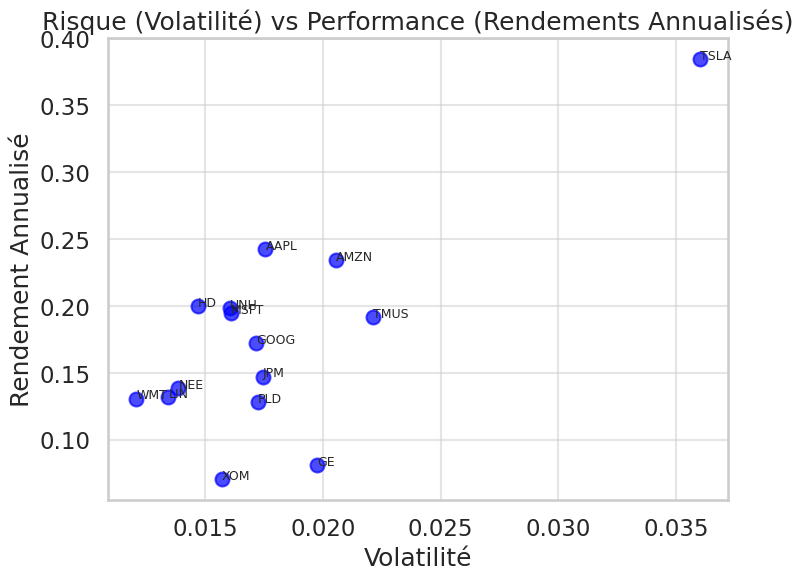

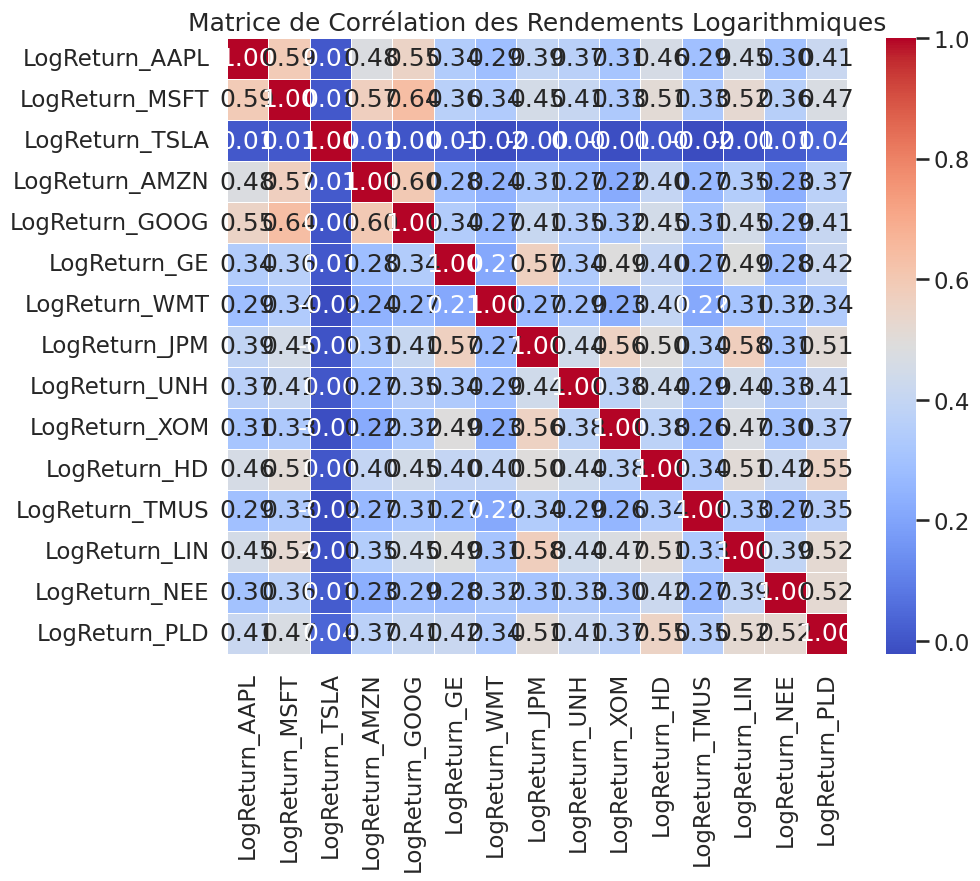

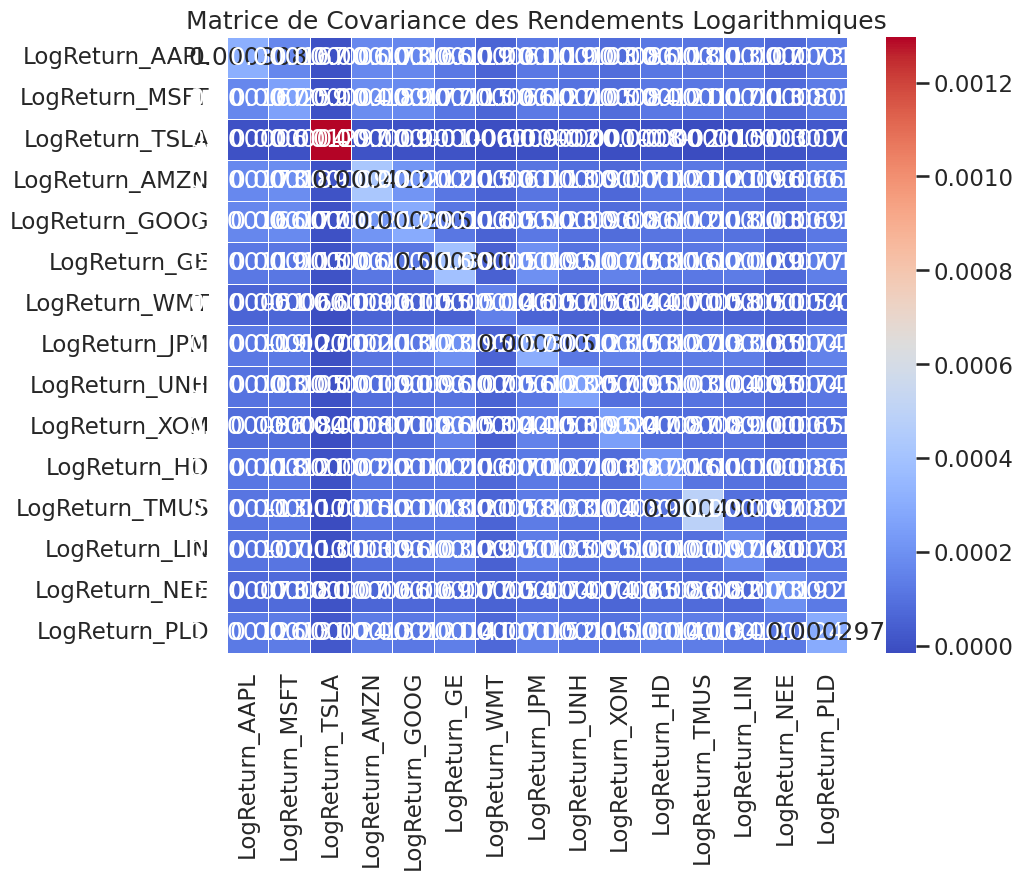

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns


print("=" * 50)
# Nuage de points pour Volatilité vs Rendements Annualisés
plt.figure(figsize=(8, 6))
plt.scatter(summary_df['Volatility'], summary_df['AnnualizedMeanLogReturn'], c='blue', alpha=0.7, s=100)
for i, stock in enumerate(summary_df['StockID']):
    plt.text(summary_df['Volatility'][i], summary_df['AnnualizedMeanLogReturn'][i], stock, fontsize=9)
plt.title('Risque (Volatilité) vs Performance (Rendements Annualisés)')
plt.xlabel('Volatilité')
plt.ylabel('Rendement Annualisé')
plt.grid(alpha=0.5)
plt.show()
print("=" * 50)
# Heatmap pour la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Rendements Logarithmiques')
plt.show()
print("=" * 50)
# Heatmap pour la matrice de covariance
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.6f', linewidths=0.5)
plt.title('Matrice de Covariance des Rendements Logarithmiques')
plt.show()


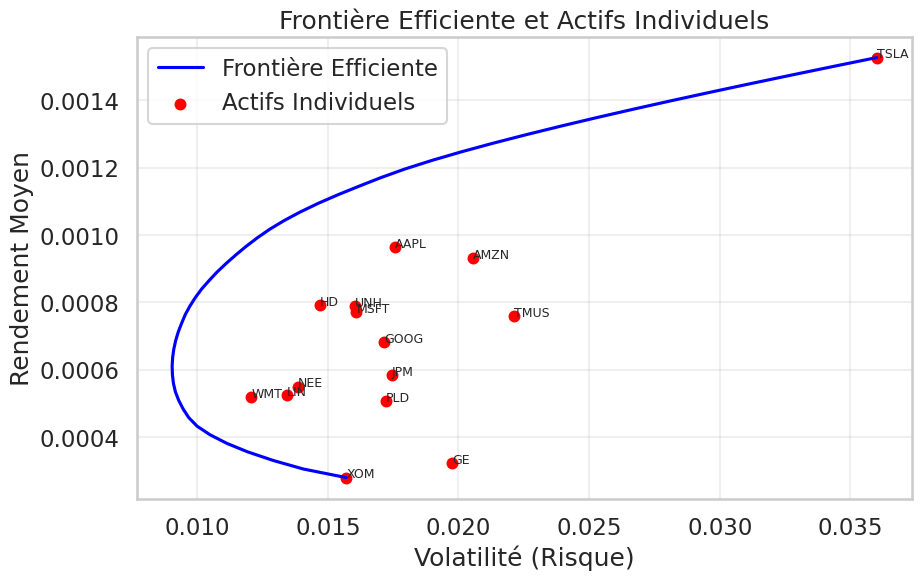

In [128]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
mean_returns = summary_df['MeanLogReturn'].values  # Rendements moyens
cov_matrix = covariance_matrix.values  # Matrice de covariance
num_assets = len(mean_returns)

# Fonction pour calculer la performance d'un portefeuille
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)  # Rendement du portefeuille
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Volatilité du portefeuille
    return returns, risk

# Fonction pour minimiser le risque (volatilité) pour un rendement cible
def minimize_volatility(weights, mean_returns, cov_matrix, target_return):
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Pondérations totales = 1
        {'type': 'eq', 'fun': lambda w: np.dot(w, mean_returns) - target_return}  # Rendement cible
    ]
    bounds = [(0, 1) for _ in range(num_assets)]  # Contraindre les pondérations entre 0 et 1
    result = minimize(
        lambda w: portfolio_performance(w, mean_returns, cov_matrix)[1],  # Minimiser la volatilité
        x0=np.ones(num_assets) / num_assets,  # Initialiser avec des pondérations égales
        constraints=constraints,
        bounds=bounds
    )
    return result

# Calculer les points de la frontière efficiente
target_returns = np.linspace(min(mean_returns), max(mean_returns), 50)  # Rendements cibles
efficient_portfolios = []

for target in target_returns:
    result = minimize_volatility(np.ones(num_assets) / num_assets, mean_returns, cov_matrix, target)
    if result.success:
        efficient_portfolios.append(portfolio_performance(result.x, mean_returns, cov_matrix))

# Extraire les risques et rendements pour la frontière efficiente
efficient_risks = [portfolio[1] for portfolio in efficient_portfolios]
efficient_returns = [portfolio[0] for portfolio in efficient_portfolios]

# Tracer la frontière efficiente
plt.figure(figsize=(10, 6))
plt.plot(efficient_risks, efficient_returns, label='Frontière Efficiente', color='blue')
plt.scatter(summary_df['Volatility'], summary_df['MeanLogReturn'], c='red', label='Actifs Individuels', s=50)
for i, stock in enumerate(summary_df['StockID']):
    plt.text(summary_df['Volatility'][i], summary_df['MeanLogReturn'][i], stock, fontsize=9)
plt.title('Frontière Efficiente et Actifs Individuels')
plt.xlabel('Volatilité (Risque)')
plt.ylabel('Rendement Moyen')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [129]:
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
# Initialiser les pondérations égales
initial_weights = np.ones(num_assets) / num_assets
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
bounds = [(0, 1) for _ in range(num_assets)]

# Optimiser pour minimiser la volatilité
result = minimize(
    fun=portfolio_volatility,  # Fonction à minimiser (volatilité)
    x0=initial_weights,  # Pondérations initiales
    args=(cov_matrix,),  # Arguments supplémentaires pour la fonction
    method='SLSQP',  # Méthode d'optimisation
    bounds=bounds,  # Limites des pondérations
    constraints=constraints  # Contraintes
)

# Résultats
optimal_weights = result.x  # Pondérations optimales
minimum_volatility = result.fun  # Volatilité minimale

# Calcul du rendement du portefeuille optimal
portfolio_return = np.dot(optimal_weights, mean_returns)  # Produit scalaire

# Afficher les résultats
print("Pondérations optimales pour minimiser la volatilité :")
for i, weight in enumerate(optimal_weights):
    print(f"Action {i+1}: {weight:.4f}")
print(f"\nVolatilité minimale du portefeuille : {minimum_volatility:.4f}")
print(f"Rendement du portefeuille à volatilité minimum : {portfolio_return:.4f}")

Pondérations optimales pour minimiser la volatilité :
Action 1: 0.0058
Action 2: 0.0009
Action 3: 0.0657
Action 4: 0.0264
Action 5: 0.0321
Action 6: 0.0005
Action 7: 0.3595
Action 8: 0.0000
Action 9: 0.0546
Action 10: 0.1107
Action 11: 0.0209
Action 12: 0.0147
Action 13: 0.1243
Action 14: 0.1839
Action 15: 0.0000

Volatilité minimale du portefeuille : 0.0090
Rendement du portefeuille à volatilité minimum : 0.0006


In [130]:
print(all_data)

           Date  Price_AAPL  LogReturn_AAPL  Price_MSFT  LogReturn_MSFT  \
0    2009-12-22    6.036181        0.010688   23.202808        0.009782   
1    2009-12-23    6.088603        0.008647   23.278091        0.003239   
2    2009-12-24    6.297683        0.033763   23.338324        0.002584   
3    2009-12-28    6.375106        0.012219   23.466311        0.005469   
4    2009-12-29    6.299490       -0.011932   23.631929        0.007033   
...         ...         ...             ...         ...             ...   
3787 2025-01-13  234.399994       -0.010398  417.190002       -0.004210   
3788 2025-01-14  233.279999       -0.004790  415.670013       -0.003650   
3789 2025-01-15  237.869995        0.019485  426.309998        0.025275   
3790 2025-01-16  228.259995       -0.041239  424.579987       -0.004066   
3791 2025-01-17  229.979996        0.007507  429.029999        0.010426   

      Price_TSLA  LogReturn_TSLA  Price_AMZN  LogReturn_AMZN  Price_GOOG  ...  \
0       1.588667  

In [131]:

# Initialiser le DataFrame final
filtered_portfolio = None

# Parcourir chaque position dans enriched_portfolio_df
for index, row in enriched_portfolio_df.iterrows():
    stock_id = row['StockID']
    open_date = row['OpenDate']
    price_column = f"Price_{stock_id}"
    log_return_column = f"LogReturn_{stock_id}"

    # Extraire les colonnes pertinentes pour l'actif
    stock_data = all_data[['Date', price_column, log_return_column]].copy()

    # Filtrer les données à partir de la date d'ouverture
    stock_data = stock_data[stock_data['Date'] >= open_date]

    # Renommer les colonnes pour l'identifiant d'actif spécifique
    stock_data = stock_data.rename(columns={
        'Date': f'Date_{stock_id}',
        price_column: f'Price_{stock_id}',
        log_return_column: f'LogReturn_{stock_id}',
    })

    # Fusionner les données avec le DataFrame final
    if filtered_portfolio is None:
        filtered_portfolio = stock_data
    else:
        # Fusion externe basée sur l'index
        filtered_portfolio = pd.merge(
            filtered_portfolio, stock_data,
            how='outer',
            left_index=True, right_index=True
        )

# Réinitialiser l'index pour un tableau propre
filtered_portfolio = filtered_portfolio.reset_index(drop=True)

# Afficher un aperçu des données filtrées et consolidées
print("\nDonnées filtrées et fusionnées :")
print(filtered_portfolio.tail())



Données filtrées et fusionnées :
     Date_AAPL  Price_AAPL  LogReturn_AAPL  Date_MSFT  Price_MSFT  \
749 2025-01-13  234.399994       -0.010398 2025-01-13  417.190002   
750 2025-01-14  233.279999       -0.004790 2025-01-14  415.670013   
751 2025-01-15  237.869995        0.019485 2025-01-15  426.309998   
752 2025-01-16  228.259995       -0.041239 2025-01-16  424.579987   
753 2025-01-17  229.979996        0.007507 2025-01-17  429.029999   

     LogReturn_MSFT  Date_TSLA  Price_TSLA  LogReturn_TSLA  Date_AMZN  ...  \
749       -0.004210 2025-01-13         NaN             NaN 2025-01-13  ...   
750       -0.003650 2025-01-14         NaN             NaN 2025-01-14  ...   
751        0.025275 2025-01-15         NaN             NaN 2025-01-15  ...   
752       -0.004066 2025-01-16         NaN             NaN 2025-01-16  ...   
753        0.010426 2025-01-17         NaN             NaN 2025-01-17  ...   

     LogReturn_TMUS   Date_LIN   Price_LIN  LogReturn_LIN   Date_NEE  \
749       

In [132]:
from google.colab import files  # Import nécessaire pour Google Colab

if not filtered_portfolio.empty:
    # Exporter le DataFrame vers un fichier Excel
    filtered_portfolio.to_excel('output_file.xlsx', index=False)

    # Télécharger le fichier
    files.download('output_file.xlsx')
else:
    print("Le DataFrame est vide, l'exportation a échoué.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Données filtrées et fusionnées (Dates corrigées) :
   Date_AAPL  Price_AAPL  LogReturn_AAPL Date_MSFT  Price_MSFT  \
0 2022-01-18  167.063385       -0.019075       NaT         NaN   
1 2022-01-19  163.550919       -0.021249       NaT         NaN   
2 2022-01-20  161.858612       -0.010401       NaT         NaN   
3 2022-01-21  159.792465       -0.012847       NaT         NaN   
4 2022-01-24  159.015244       -0.004876       NaT         NaN   

   LogReturn_MSFT Date_TSLA  Price_TSLA  LogReturn_TSLA Date_AMZN  ...  \
0             NaN       NaT         NaN             NaN       NaT  ...   
1             NaN       NaT         NaN             NaN       NaT  ...   
2             NaN       NaT         NaN             NaN       NaT  ...   
3             NaN       NaT         NaN             NaN       NaT  ...   
4             NaN       NaT         NaN             NaN       NaT  ...   

   LogReturn_TMUS  Date_LIN Price_LIN  LogReturn_LIN  Date_NEE Price_NEE  \
0             NaN       NaT   

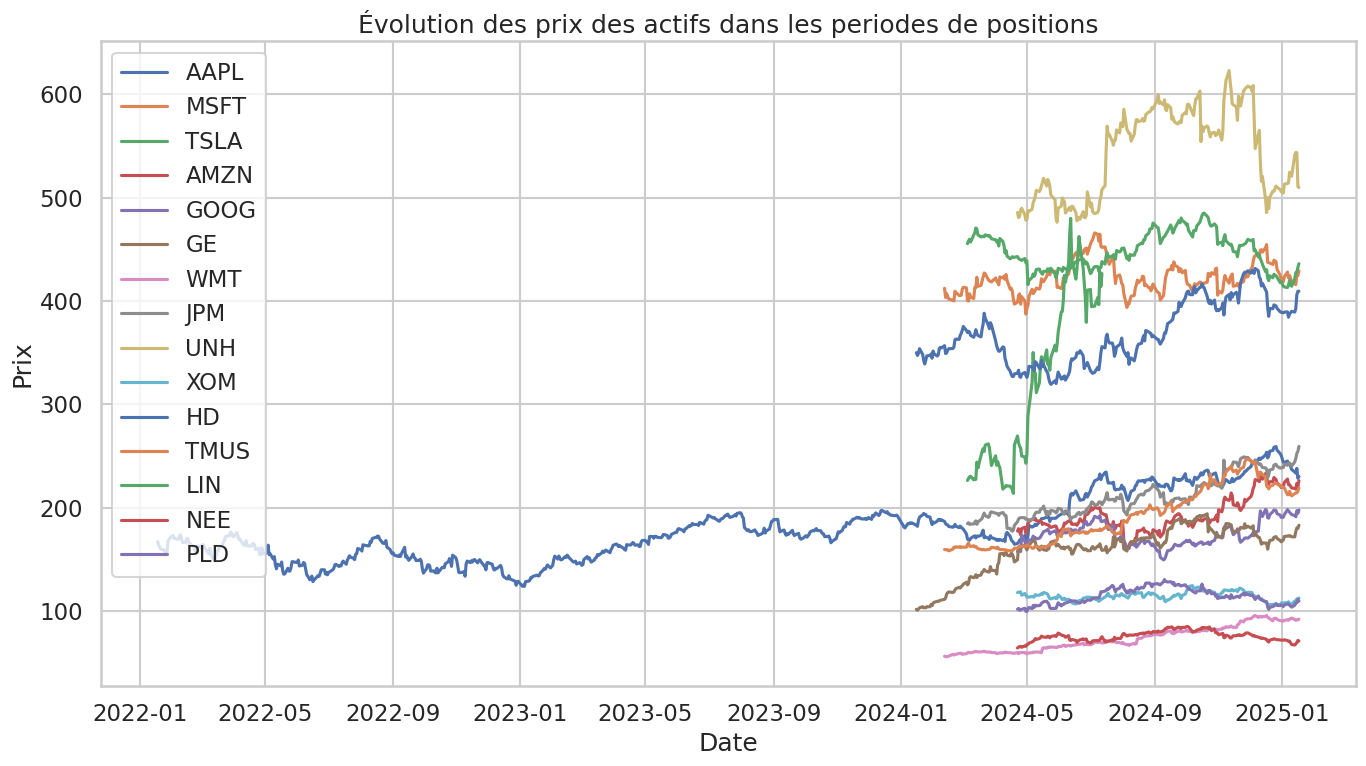

In [133]:
# Conversion des colonnes Date_* en objets datetime et remplacement des NaT par des vides
for column in filtered_portfolio.columns:
    if column.startswith('Date_'):
        filtered_portfolio[column] = pd.to_datetime(filtered_portfolio[column], errors='coerce')  # Convertir en datetime
        filtered_portfolio[column] = filtered_portfolio[column].fillna('')  # Remplacer NaT par vides

# Vérification après correction
print("\nDonnées filtrées et fusionnées (Dates corrigées) :")
print(filtered_portfolio.head())

# Fonction de visualisation
def plot_price_evolution(data, title="Évolution des prix des actifs dans les periodes de positions"):
    plt.figure(figsize=(14, 8))

    # Parcourir les colonnes des prix dans le DataFrame
    for column in data.columns:
        if column.startswith('Price_'):  # Identifier les colonnes de prix
            stock_id = column.replace('Price_', '')  # Extraire l'identifiant de l'actif
            date_column = f"Date_{stock_id}"  # Colonne associée des dates

            # Vérifier que les colonnes nécessaires existent et ne sont pas vides
            if date_column in data.columns:
                valid_rows = data[date_column] != ''  # Filtrer les lignes valides
                if valid_rows.any():  # Vérifier qu'il y a des données valides à tracer
                    plt.plot(data.loc[valid_rows, date_column], data.loc[valid_rows, column], label=stock_id)

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Prix")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Appeler la fonction de visualisation
plot_price_evolution(filtered_portfolio)


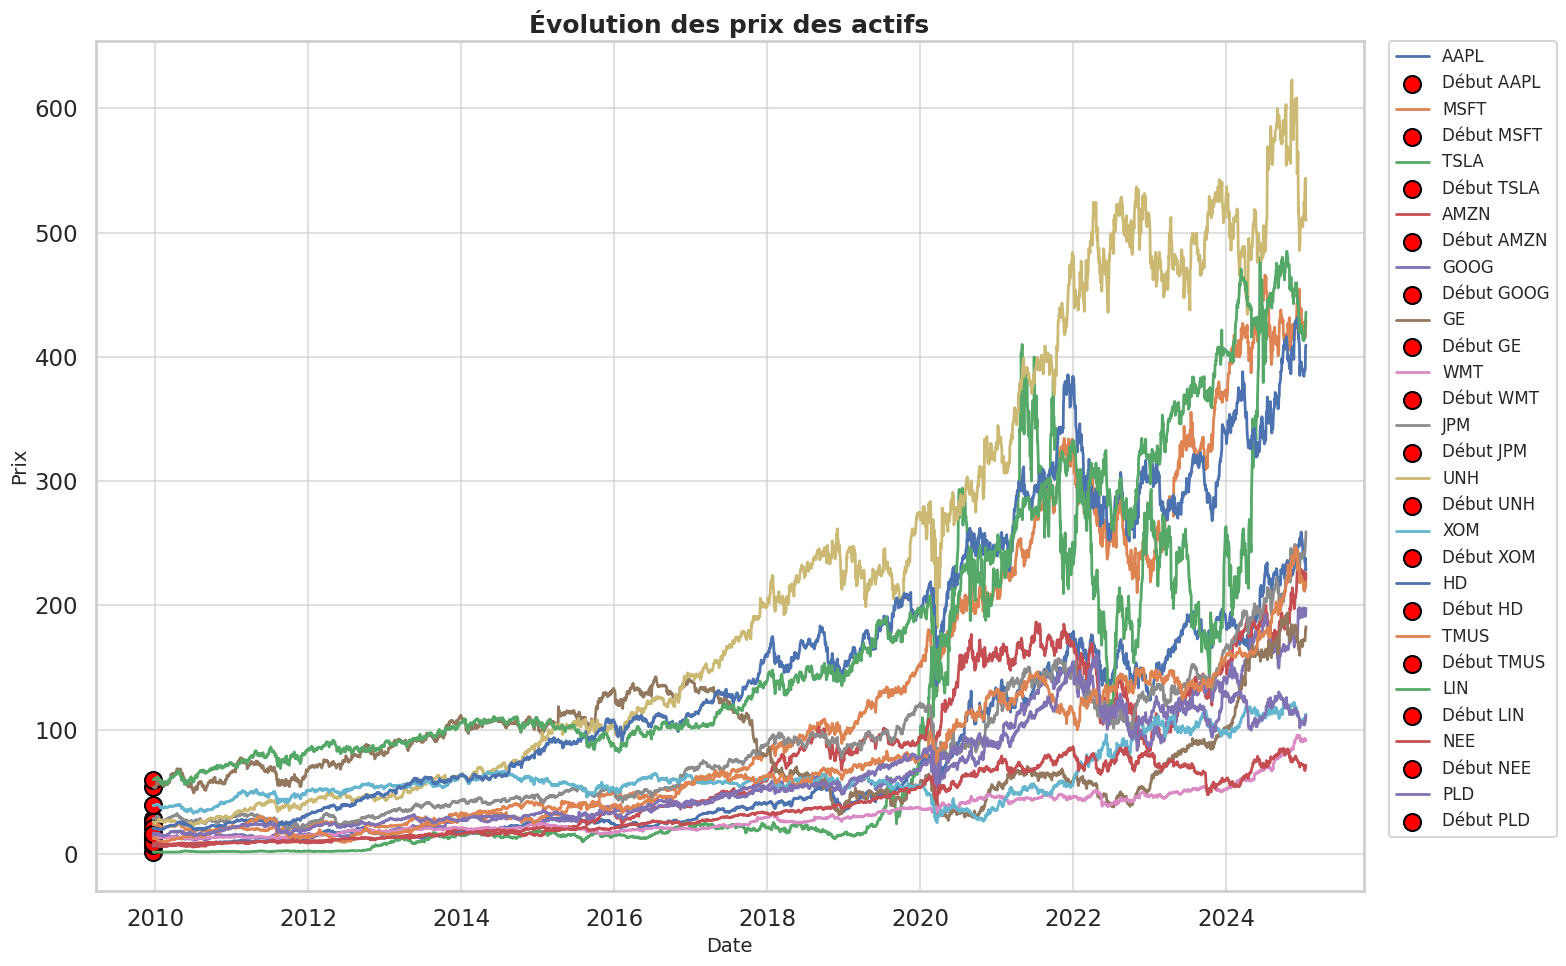

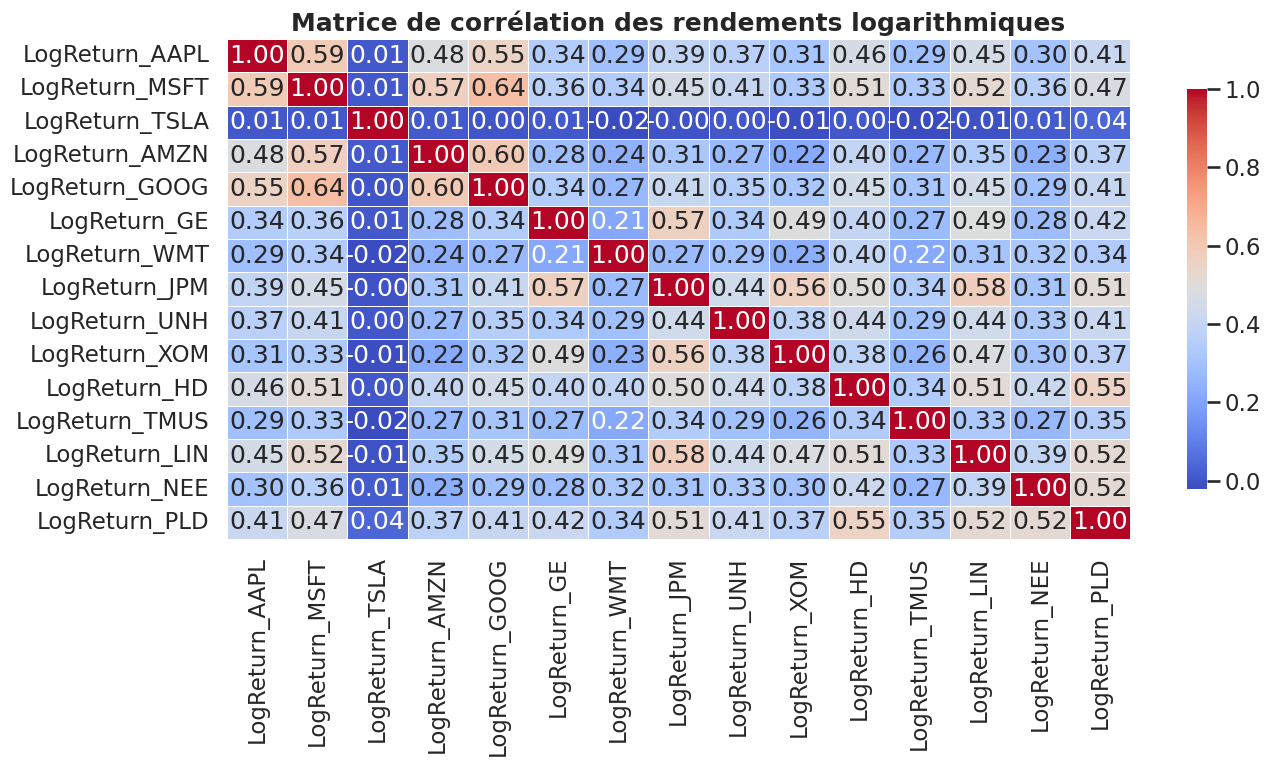

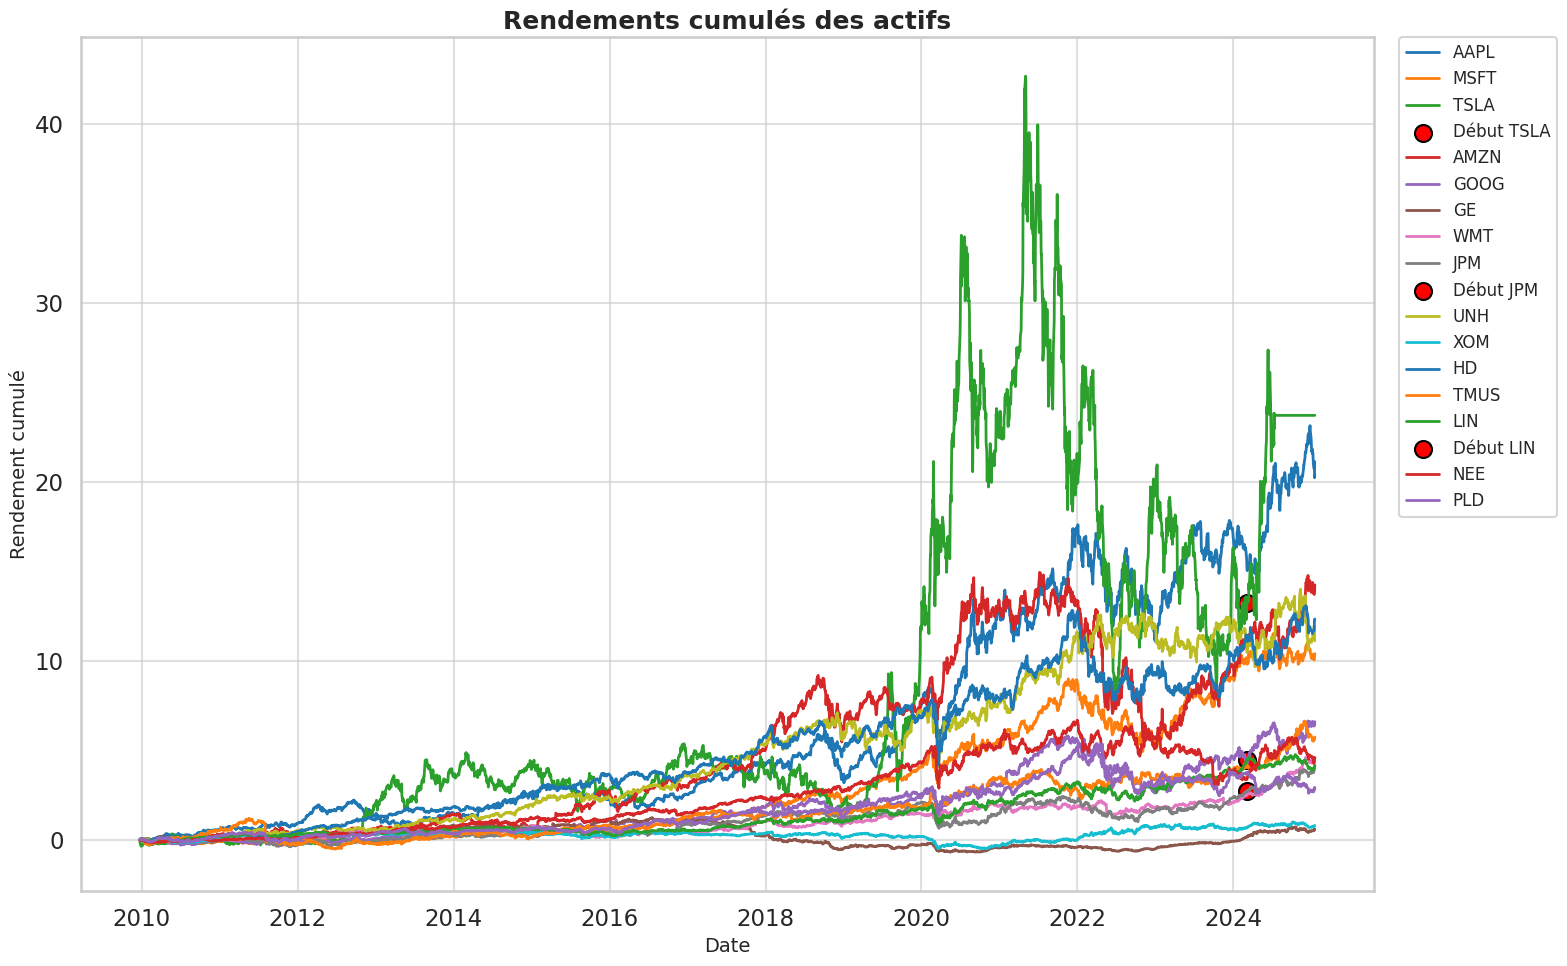

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurer le style professionnel
sns.set_theme(style="whitegrid", context="talk")

# Couleurs personnalisées pour chaque actif
colors = sns.color_palette("tab10")

def adjust_duplicate_dates(existing_dates, date):
    """
    Décale légèrement une date si elle est déjà utilisée, pour éviter la superposition.
    """
    while date in existing_dates:
        date += pd.Timedelta(days=1)  # Décaler de 0.5 jour
    existing_dates.add(date)
    return date

# 1. **Évolution des prix des actifs avec mise en valeur des positions**
plt.figure(figsize=(16, 10))

for idx, column in enumerate(all_data.columns):
    if column.startswith("Price_"):
        stock_id = column.replace("Price_", "")

        # Tracer la courbe des prix de l'actif
        plt.plot(all_data['Date'], all_data[column], label=stock_id, linewidth=2)

        # Identifier la première date valide pour cet actif
        first_valid_date_idx = all_data[column].first_valid_index()
        if first_valid_date_idx is not None:
            start_date = all_data.loc[first_valid_date_idx, 'Date']
            start_price = all_data.loc[first_valid_date_idx, column]

            # Ajouter un point rouge pour marquer la position de départ
            plt.scatter(start_date, start_price, color="red", edgecolor="black", s=150, label=f"Début {stock_id}")

plt.title("Évolution des prix des actifs", fontsize=18, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Prix", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()



# 3. **Heatmap des corrélations des rendements logarithmiques**
log_return_columns = [col for col in all_data.columns if col.startswith("LogReturn_")]
correlation_matrix = all_data[log_return_columns].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Matrice de corrélation des rendements logarithmiques", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

# 4. **Rendements cumulés par actif avec mise en évidence des positions**
plt.figure(figsize=(16, 10))
existing_dates = set()
for idx, column in enumerate(log_return_columns):
    stock_id = column.replace("LogReturn_", "")
    cumulative_return = (1 + all_data[column].fillna(0)).cumprod() - 1
    plt.plot(all_data['Date'], cumulative_return, label=stock_id, color=colors[idx % len(colors)], linewidth=2)

    # Identifier le point de début de la position
    position_start = enriched_portfolio_df.loc[enriched_portfolio_df['StockID'] == stock_id, 'OpenDate']
    if not position_start.empty:
        start_date = position_start.values[0]
        start_cum_return = cumulative_return.loc[all_data['Date'] == start_date].values
        if len(start_cum_return) > 0:
            # Ajuster pour éviter les doublons
            adjusted_date = adjust_duplicate_dates(existing_dates, pd.Timestamp(start_date))
            plt.scatter(adjusted_date, start_cum_return, color="red", edgecolor="black", s=150, label=f"Début {stock_id}")

plt.title("Rendements cumulés des actifs", fontsize=18, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Rendement cumulé", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()


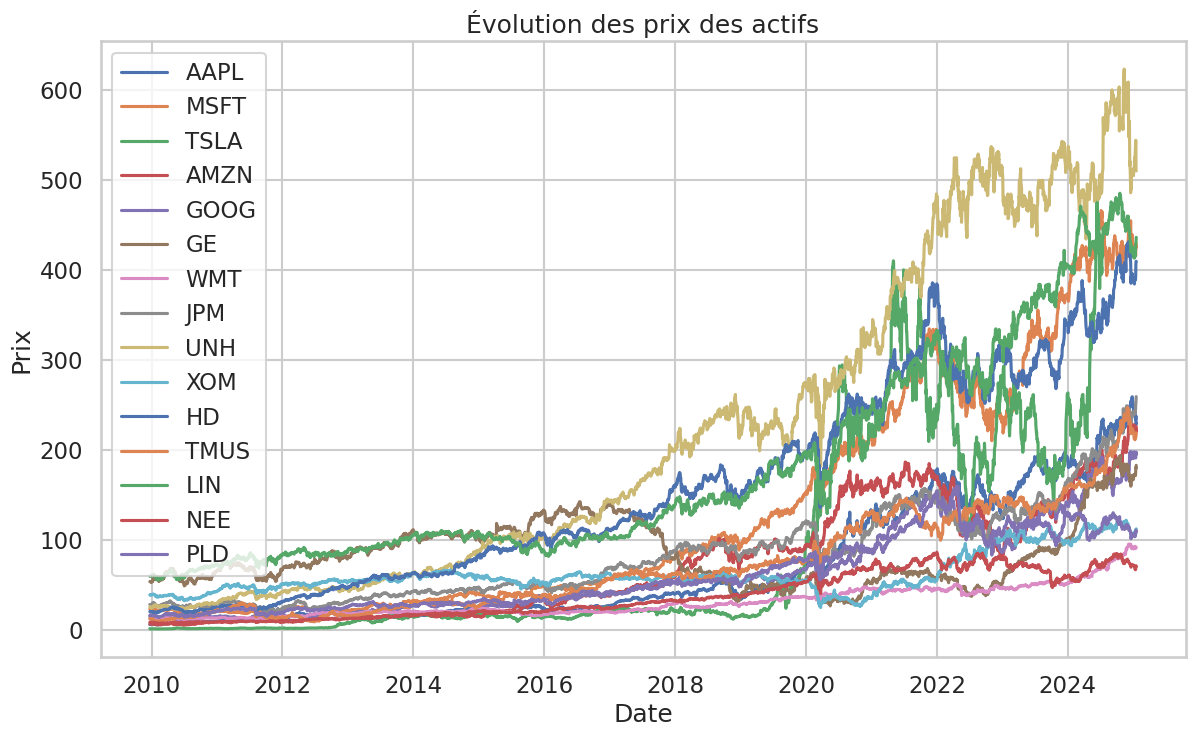

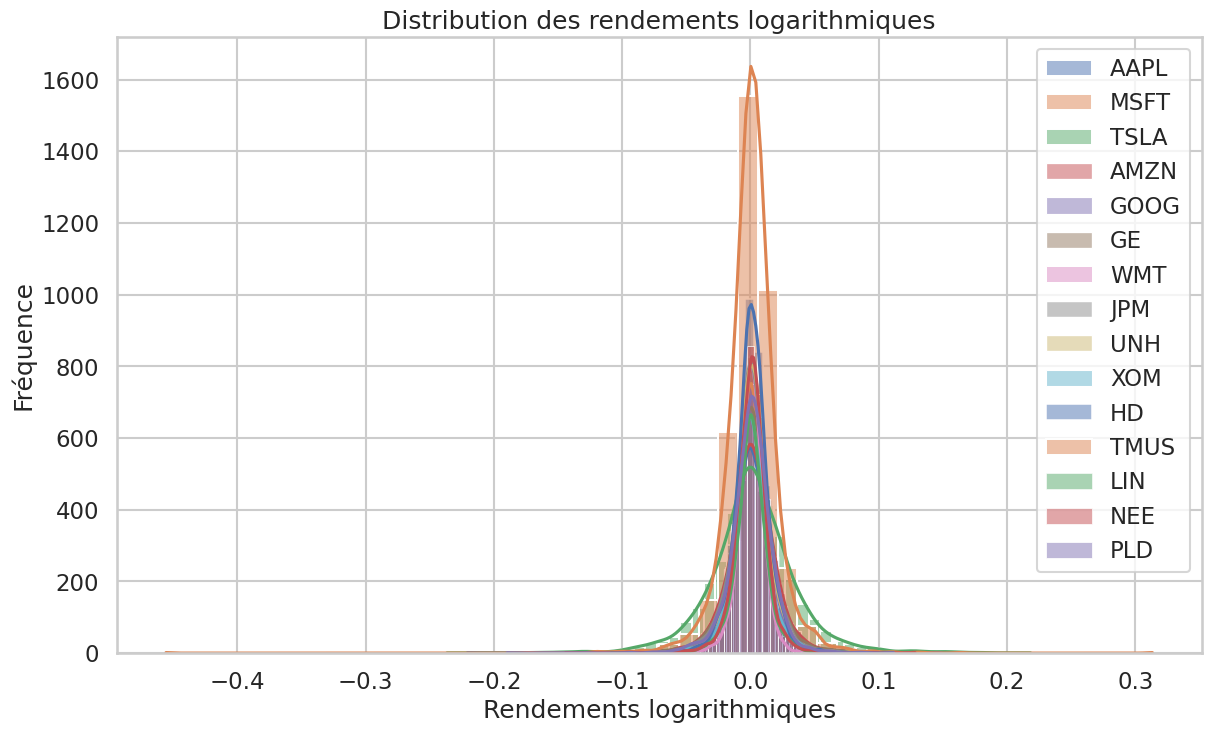

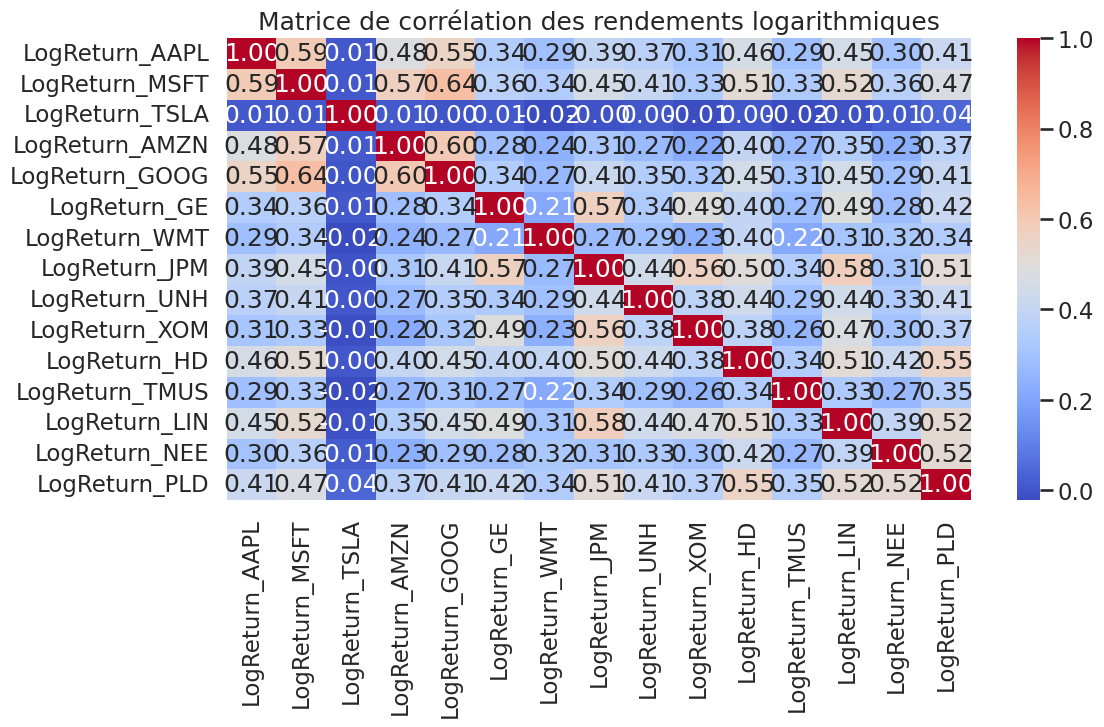

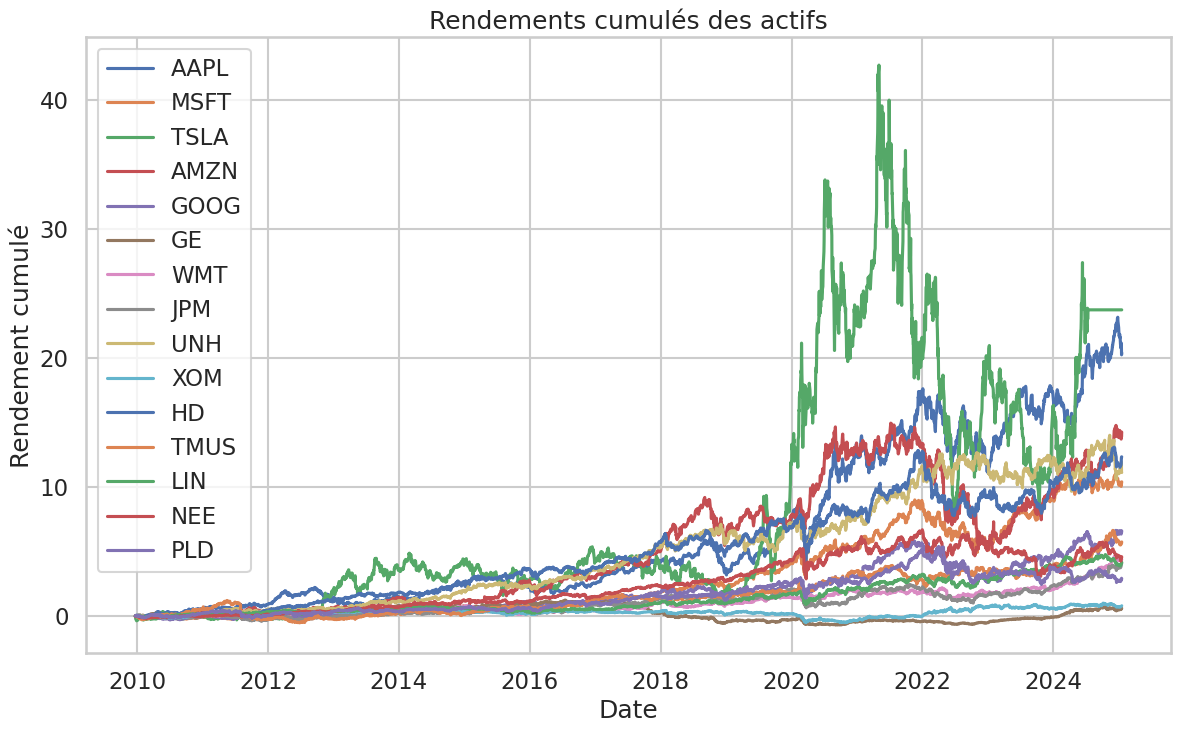

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Charger les données

plt.figure(figsize=(14, 8))
for column in all_data.columns:
    if column.startswith("Price_"):
        plt.plot(all_data['Date'], all_data[column], label=column.replace("Price_", ""))
plt.title("Évolution des prix des actifs")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()

# 2. **Histogramme des rendements logarithmiques**
plt.figure(figsize=(14, 8))
for column in all_data.columns:
    if column.startswith("LogReturn_"):
        sns.histplot(all_data[column].dropna(), kde=True, label=column.replace("LogReturn_", ""), bins=50)
plt.title("Distribution des rendements logarithmiques")
plt.xlabel("Rendements logarithmiques")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

# 3. **Heatmap des corrélations des rendements logarithmiques**
# Extraire uniquement les colonnes des rendements logarithmiques
log_return_columns = [col for col in all_data.columns if col.startswith("LogReturn_")]
correlation_matrix = all_data[log_return_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des rendements logarithmiques")
plt.show()

# 4. **Rendements cumulés par actif**
plt.figure(figsize=(14, 8))
for column in log_return_columns:
    cumulative_return = (1 + all_data[column].fillna(0)).cumprod() - 1
    plt.plot(all_data['Date'], cumulative_return, label=column.replace("LogReturn_", ""))
plt.title("Rendements cumulés des actifs")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")
plt.legend()
plt.grid(True)
plt.show()


In [136]:
# Convertir la colonne 'Date' à un format accepté par Excel (sans fuseau horaire)
#all_data['Date'] = pd.to_datetime(all_data['Date']).dt.tz_localize(None)

# Exporter le DataFrame vers Excelx
#all_data.to_excel('output_file.xlsx', index=False)

# Télécharger le fichier
#files.download('output_file.xlsx')

In [156]:

##############################################################################GOOOOOOD########################################
import yfinance as yf
from datetime import datetime
import pandas as pd

# Exemple de réponses de l'utilisateur
user_responses = pd.DataFrame({
    'HedgingBeginingPeriod': ['2025-01-19'],  # Horizon de couverture global
    'HedgingEndingPeriod': ['2026-01-16'],  # Horizon de couverture global
    'CoveringPart': ['All'],  # Quelle partie du portefeuille couvrir (All ou Positions spécifiques)
    'TargetCoverage': [0.8],  # Pourcentage de couverture souhaité global
    'AllowedInstruments': ['Futures,Options,Swaps'],  # Instruments autorisés
})

# Récupérer les dates de début et de fin de la période de couverture
begin_period = datetime.strptime(user_responses['HedgingBeginingPeriod'][0], "%Y-%m-%d")
end_period = datetime.strptime(user_responses['HedgingEndingPeriod'][0], "%Y-%m-%d")

# Liste des tickers à traiter
tickers = [
    "AAPL", "GOOGL", "AMZN", "MSFT", "TSLA", "NFLX", "META",
    "NVDA", "AMD", "BA", "DIS", "IBM", "V", "JNJ", "TSM", "GOOG",
    "MCD", "WMT"]

# Liste pour stocker toutes les options
all_options = []

# Parcourir chaque ticker et récupérer les options
for ticker in tickers:
    asset = yf.Ticker(ticker)
    last_price = asset.history(period="1mo")['Close'].iloc[-1]

    # Obtenir les dates d'expiration disponibles
    expiration_dates = asset.options

    # Vérifier si des dates d'expiration sont disponibles
    if expiration_dates:
        for selected_expiration in expiration_dates:
            # Convertir la date d'expiration au format datetime
            expiration_date = datetime.strptime(selected_expiration, "%Y-%m-%d")

            # Vérifier si la date d'expiration se situe dans la période de couverture
            if begin_period <= expiration_date <= end_period:
                # Calculer le temps restant jusqu'à l'échéance en années
                current_date = datetime.today()
                time_to_expiration = (expiration_date - current_date).days / 365  # Convertir en années

                # Obtenir les options pour cette date d'expiration
                options_chain = asset.option_chain(selected_expiration)
                calls = options_chain.calls
                puts = options_chain.puts

                # Construire la liste des options pour chaque ticker
                options = []
                for _, row in calls.iterrows():
                    options.append({
                        'name': f"Call {ticker} Strike {row['strike']}",
                        'strike': row['strike'],
                        'cost': row['lastPrice'],
                        'time_to_expiration': time_to_expiration,
                        'expiration_date': selected_expiration,  # Ajouter la date d'expiration
                        'last_price': last_price,  # Ajouter le dernier prix de l'action
                        'open_interest': row['openInterest']  # Ajouter l'intérêt ouvert (quantité d'options disponibles)


                    })

                for _, row in puts.iterrows():
                    options.append({
                        'name': f"Put {ticker} Strike {row['strike']}",
                        'strike': row['strike'],
                        'cost': row['lastPrice'],
                        'time_to_expiration': time_to_expiration,
                        'expiration_date': selected_expiration,  # Ajouter la date d'expiration
                        'last_price': last_price,  # Ajouter le dernier prix de l'action
                        'open_interest': row['openInterest']  # Ajouter l'intérêt ouvert (quantité d'options disponibles)


                    })

                # Ajouter les options du ticker à la liste globale
                all_options.extend(options)
    else:
        print(f"Pas de dates d'expiration disponibles pour {ticker}")

# Créer un DataFrame avec les options
options_df = pd.DataFrame(all_options)

# Afficher le DataFrame
print(options_df)


                         name  strike    cost  time_to_expiration  \
0      Call AAPL Strike 100.0   100.0  134.60            0.005479   
1      Call AAPL Strike 115.0   115.0  116.31            0.005479   
2      Call AAPL Strike 120.0   120.0  134.55            0.005479   
3      Call AAPL Strike 125.0   125.0  110.14            0.005479   
4      Call AAPL Strike 130.0   130.0  124.00            0.005479   
...                       ...     ...     ...                 ...   
31160    Put WMT Strike 200.0   200.0   27.81            0.983562   
31161    Put WMT Strike 210.0   210.0   34.04            0.983562   
31162    Put WMT Strike 220.0   220.0   66.25            0.983562   
31163    Put WMT Strike 230.0   230.0   65.05            0.983562   
31164    Put WMT Strike 250.0   250.0   87.49            0.983562   

      expiration_date  last_price  open_interest  
0          2025-01-24  221.570007            4.0  
1          2025-01-24  221.570007           23.0  
2          2025-01

In [157]:
print(options_df)


                         name  strike    cost  time_to_expiration  \
0      Call AAPL Strike 100.0   100.0  134.60            0.005479   
1      Call AAPL Strike 115.0   115.0  116.31            0.005479   
2      Call AAPL Strike 120.0   120.0  134.55            0.005479   
3      Call AAPL Strike 125.0   125.0  110.14            0.005479   
4      Call AAPL Strike 130.0   130.0  124.00            0.005479   
...                       ...     ...     ...                 ...   
31160    Put WMT Strike 200.0   200.0   27.81            0.983562   
31161    Put WMT Strike 210.0   210.0   34.04            0.983562   
31162    Put WMT Strike 220.0   220.0   66.25            0.983562   
31163    Put WMT Strike 230.0   230.0   65.05            0.983562   
31164    Put WMT Strike 250.0   250.0   87.49            0.983562   

      expiration_date  last_price  open_interest  
0          2025-01-24  221.570007            4.0  
1          2025-01-24  221.570007           23.0  
2          2025-01

# Determiné la volatilité implicite et le taux sans risque pour les periodes adapté


In [158]:
import numpy as np
import scipy.stats as si
import pandas as pd

# Fonction pour calculer le delta d'une option via la formule de Black-Scholes
def black_scholes_delta(S, K, T, r, sigma, option_type='call'):
    """
    Calcule le delta d'une option européenne avec la formule de Black-Scholes.

    :param S: Prix de l'actif sous-jacent (S₀)
    :param K: Prix d'exercice (strike)
    :param T: Temps jusqu'à l'échéance (en années)
    :param r: Taux d'intérêt sans risque (en décimal)
    :param sigma: Volatilité implicite (en décimal)
    :param option_type: Type d'option ('call' ou 'put')
    :return: Delta de l'option
    """
    # Calcul de d1 dans la formule de Black-Scholes
    d1 = (np.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))

    # Calcul du delta en fonction du type d'option
    if option_type == 'call':
        return si.norm.cdf(d1)  # N(d1) pour un call
    elif option_type == 'put':
        return si.norm.cdf(d1) - 1  # N(d1) - 1 pour un put
    else:
        raise ValueError("Le type d'option doit être 'call' ou 'put'.")

# Exemple de taux d'intérêt sans risque et volatilité (vous pouvez ajuster)
r = 0.05  # Taux d'intérêt sans risque (5%)
sigma = 0.2  # Volatilité implicite (20%)

# Parcourir le DataFrame et calculer le delta pour chaque option
def calculate_option_deltas(options_df):
    deltas = []

    for index, row in options_df.iterrows():
        S = row['last_price']  # Le prix actuel de l'actif sous-jacent
        K = row['strike']  # Le prix d'exercice (strike)
        T = row['time_to_expiration']  # Le temps jusqu'à l'échéance (en années)
        option_type = 'call' if 'Call' in row['name'] else 'put'  # Déterminer le type d'option

        # Calculer le delta
        delta = black_scholes_delta(S, K, T, r, sigma, option_type)
        deltas.append(delta)

    # Ajouter la colonne 'delta' au DataFrame
    options_df['delta'] = deltas
    return options_df

# Appliquer le calcul des deltas sur le DataFrame options_df
options_df = calculate_option_deltas(options_df)

# Afficher le DataFrame avec la colonne 'delta'
print(options_df)


                         name  strike    cost  time_to_expiration  \
0      Call AAPL Strike 100.0   100.0  134.60            0.005479   
1      Call AAPL Strike 115.0   115.0  116.31            0.005479   
2      Call AAPL Strike 120.0   120.0  134.55            0.005479   
3      Call AAPL Strike 125.0   125.0  110.14            0.005479   
4      Call AAPL Strike 130.0   130.0  124.00            0.005479   
...                       ...     ...     ...                 ...   
31160    Put WMT Strike 200.0   200.0   27.81            0.983562   
31161    Put WMT Strike 210.0   210.0   34.04            0.983562   
31162    Put WMT Strike 220.0   220.0   66.25            0.983562   
31163    Put WMT Strike 230.0   230.0   65.05            0.983562   
31164    Put WMT Strike 250.0   250.0   87.49            0.983562   

      expiration_date  last_price  open_interest     delta  
0          2025-01-24  221.570007            4.0  1.000000  
1          2025-01-24  221.570007           23.0 

In [159]:
options_df.columns


Index(['name', 'strike', 'cost', 'time_to_expiration', 'expiration_date',
       'last_price', 'open_interest', 'delta'],
      dtype='object')

In [160]:
options_df['potential_coverage'] = options_df['delta'] * options_df['last_price']
hedging_ending_period = user_responses['HedgingEndingPeriod'][0]  # Exemple : '2025-01-21'

# Convertir la date cible en objet datetime (si nécessaire)
if isinstance(hedging_ending_period, str):
    target_date = datetime.strptime(hedging_ending_period, "%Y-%m-%d")
elif isinstance(hedging_ending_period, datetime):
    target_date = hedging_ending_period
else:
    raise ValueError("Le format de 'HedgingEndingPeriod' n'est pas reconnu.")

# Date actuelle
current_date = datetime.now()

# Calculer le nombre de jours jusqu'à la fin de la période
days_to_end = (target_date - current_date).days

# Convertir en années
years_to_end = days_to_end / 365.0
print(years_to_end)





0.9835616438356164


In [161]:
tolerance = 1e-6

# Filtrer les options avec une comparaison approximative
options_df = options_df[
    (options_df['time_to_expiration'] >= years_to_end - tolerance) &
    (options_df['time_to_expiration'] <= years_to_end + tolerance)
]
print(options_df)
options_df['delta'] = options_df['delta'].astype(float)
tolerance2 = 1e-2

# Filtrer les valeurs de delta en dehors de l'intervalle [1 - tolérance, 1 + tolérance]
options_df = options_df[
    ~((options_df['delta'] >= 1 - tolerance2) & (options_df['delta'] <= 1 + tolerance2))
]
# Convertir en float au cas où ce n'est pas déjà fait
options_df['potential_coverage'] = pd.to_numeric(options_df['potential_coverage'], errors='coerce')

# Appliquer la valeur absolue
options_df['potential_coverage'] = options_df['potential_coverage'].abs()

options_df['Type'] = options_df['name'].str.split().str[0]



                        name  strike    cost  time_to_expiration  \
1456    Call AAPL Strike 5.0     5.0  237.81            0.983562   
1457   Call AAPL Strike 15.0    15.0  234.67            0.983562   
1458   Call AAPL Strike 20.0    20.0  197.49            0.983562   
1459   Call AAPL Strike 25.0    25.0  191.80            0.983562   
1460   Call AAPL Strike 30.0    30.0  200.79            0.983562   
...                      ...     ...     ...                 ...   
31160   Put WMT Strike 200.0   200.0   27.81            0.983562   
31161   Put WMT Strike 210.0   210.0   34.04            0.983562   
31162   Put WMT Strike 220.0   220.0   66.25            0.983562   
31163   Put WMT Strike 230.0   230.0   65.05            0.983562   
31164   Put WMT Strike 250.0   250.0   87.49            0.983562   

      expiration_date  last_price  open_interest     delta  potential_coverage  
1456       2026-01-16  221.570007           89.0  1.000000          221.570007  
1457       2026-01-16

<ipython-input-161-11b109313aa6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options_df['delta'] = options_df['delta'].astype(float)


In [167]:
print(options_df)

                         name  strike   cost  time_to_expiration  \
1484   Call AAPL Strike 150.0   150.0  80.90            0.983562   
1485   Call AAPL Strike 155.0   155.0  76.40            0.983562   
1486   Call AAPL Strike 160.0   160.0  71.25            0.983562   
1487   Call AAPL Strike 165.0   165.0  66.50            0.983562   
1488   Call AAPL Strike 170.0   170.0  70.20            0.983562   
...                       ...     ...    ...                 ...   
31159    Put WMT Strike 195.0   195.0  24.25            0.983562   
31160    Put WMT Strike 200.0   200.0  27.81            0.983562   
31161    Put WMT Strike 210.0   210.0  34.04            0.983562   
31162    Put WMT Strike 220.0   220.0  66.25            0.983562   
31163    Put WMT Strike 230.0   230.0  65.05            0.983562   

      expiration_date  last_price  open_interest     delta  \
1484       2026-01-16  221.570007         9982.0  0.989662   
1485       2026-01-16  221.570007          305.0  0.984165 

In [163]:
#### creatiion des deux DF : put et call
df_put = options_df[options_df['Type'] == 'Put']
df_call = options_df[options_df['Type'] == 'Call']
print(df_put)
print(df_call)

                       name  strike   cost  time_to_expiration  \
1523    Put AAPL Strike 5.0     5.0   0.01            0.983562   
1524   Put AAPL Strike 10.0    10.0   0.01            0.983562   
1525   Put AAPL Strike 20.0    20.0   0.03            0.983562   
1526   Put AAPL Strike 25.0    25.0   0.09            0.983562   
1527   Put AAPL Strike 30.0    30.0   0.05            0.983562   
...                     ...     ...    ...                 ...   
31160  Put WMT Strike 200.0   200.0  27.81            0.983562   
31161  Put WMT Strike 210.0   210.0  34.04            0.983562   
31162  Put WMT Strike 220.0   220.0  66.25            0.983562   
31163  Put WMT Strike 230.0   230.0  65.05            0.983562   
31164  Put WMT Strike 250.0   250.0  87.49            0.983562   

      expiration_date  last_price  open_interest     delta  \
1523       2026-01-16  221.570007        10631.0  0.000000   
1524       2026-01-16  221.570007          361.0  0.000000   
1525       2026-01-16

In [145]:



from scipy.optimize import linprog
import numpy as np

# Vérification des données
if options_df['potential_coverage'].isnull().any() or options_df['cost'].isnull().any():
    raise ValueError("Des valeurs nulles sont présentes dans `potential_coverage` ou `cost`.")
if (options_df['potential_coverage'] < 0).any() or (options_df['cost'] < 0).any():
    raise ValueError("Des valeurs négatives sont présentes dans `potential_coverage` ou `cost`.")



# Définir les coefficients des coûts
c = options_df['cost'].values

# Contraintes
A_eq = options_df['potential_coverage'].values.reshape(1, -1)
total_coverage_capacity = A_eq.sum()
b_eq = enriched_portfolio_df['PositionValue'].sum()
print(b_eq)
print(total_coverage_capacity)
print('èèèèèèèèèèèèèèèèèè')
if b_eq > total_coverage_capacity:
    print("La couverture cible dépasse la capacité totale disponible. Ajustement en conséquence.")
    b_eq = total_coverage_capacity

# Ajouter une contrainte pour imposer au moins deux options
A_ub = np.zeros((1, len(c)))
A_ub[0, :] = -1  # Ajout de la contrainte -x_i pour tous les i
b_ub = [-2]  # La somme des x doit être >= 2

# Bornes
bounds = [(0, None)] * len(c)

# Résolution de l'optimisation
result = linprog(c, A_eq=A_eq, b_eq=[b_eq], A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Résultats
if result.success:
    print("Solution optimale trouvée :", result.x)
    print("Coût total :", result.fun)
else:
    print("Échec de l'optimisation :", result.message)


46235.95349121094
280239.7770807143
èèèèèèèèèèèèèèèèèè
Solution optimale trouvée : [0. 0. 0. ... 0. 0. 0.]
Coût total : 202.2327316516659


In [146]:
print("Dimensions des matrices :")
print("A_ub :", A_ub.shape)



Dimensions des matrices :
A_ub : (1, 2545)


In [147]:
strategy = pd.DataFrame({
    'Instrument': options_df.loc[result.x > 0, 'name'],
    'Quantity': result.x[result.x > 0],
    'Cost': options_df.loc[result.x > 0, 'cost'] * result.x[result.x > 0],
    'Coverage': options_df.loc[result.x > 0, 'potential_coverage'] * result.x[result.x > 0],
})
print(strategy)



                  Instrument      Quantity        Cost      Coverage
27618  Call JNJ Strike 230.0  10111.636583  202.232732  46235.953491


Ajouter une contrainte de quantité , il n'ya pas autant de Call JNJ Strike 230.0 disponible !!!


In [148]:
from google.colab import files  # Import nécessaire pour Google Colab

if not options_df.empty:
    # Exporter le DataFrame vers un fichier Excel
    options_df.to_excel('output_file.xlsx', index=False)

    # Télécharger le fichier
    files.download('output_file.xlsx')
else:
    print("Le DataFrame est vide, l'exportation a échoué.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog

# **Données utilisateur**
user_responses = pd.DataFrame({
    'HedgingBeginingPeriod': ['2025-01-19'],
    'HedgingEndingPeriod': ['2026-01-16'],
    'CoveringPart': ['All'],  # Couverture de tout le portefeuille
    'TargetCoverage': [0.8],  # Niveau de couverture souhaité (80%)
})

# **Données enrichies du portefeuille**
enriched_portfolio_df = pd.DataFrame({
    'StockIndex': [1, 2, 3, 4, 5],
    'StockID': ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG'],
    'StockQty': [10, 13, 10, 20, 2],
    'OpenDate': pd.to_datetime(['2024-01-15', '2024-02-10', '2024-03-05', '2024-04-20', '2024-04-20']),
    'CurrentPrice': [229.979996, 429.029999, 426.500000, 225.940002, 197.550003],
    'PositionValue': [2299.799957, 5577.389984, 4265.000000, 4518.800049, 395.100006],
    'Weight': [0.049968, 0.121180, 0.092665, 0.098180, 0.008584],
    'PositionType': ['Long', 'Long', 'Short', 'Short', 'Long'],  # Ajout de la colonne PositionType
})



# **Étape 1 : Calcul de l'exposition**
if user_responses.loc[0, 'CoveringPart'] == 'All':
    portfolio_exposure = enriched_portfolio_df['PositionValue'].sum()
    print(f"Exposition totale du portefeuille : {portfolio_exposure}")
else:
    portfolio_exposure = enriched_portfolio_df[
        enriched_portfolio_df['StockID'].isin(user_responses['CoveringPart'])
    ]['PositionValue'].sum()
    print(f"Exposition des positions sélectionnées : {portfolio_exposure}")

# Couverture cible
target_coverage = portfolio_exposure * user_responses.loc[0, 'TargetCoverage']
print(f"Couverture cible : {target_coverage}")
# Vérification de la solvabilité
total_coverage_capacity = A_eq.sum()
if total_coverage_capacity < target_coverage:
    print(f"Erreur : La couverture cible ({target_coverage}) dépasse la capacité totale disponible ({total_coverage_capacity}).")

# **Étape 2 : Filtrer les options disponibles**
options_df = options_df[
    (options_df['open_interest'] > 0)]
print(f"Options disponibles après filtrage : {len(options_df)}")
print(options_df)

# **Étape 3 : Assigner des options selon le type de position**
selected_options = pd.DataFrame()

for index, row in enriched_portfolio_df.iterrows():
    stock_id = row['StockID']
    position_type = row['PositionType']
    position_value = row['PositionValue']

    print(f"Traitement de la position : {stock_id}, Type : {position_type}, Valeur : {position_value}")

    # Filtrer les options correspondantes au stock
    stock_options = options_df[options_df['name'].str.contains(stock_id)]
    print(f"Options pour {stock_id} : {len(stock_options)} disponibles.")

    # Sélectionner les options selon le type de position
    if position_type == 'Long':
        stock_options = stock_options[stock_options['Type'] == 'Put']
    elif position_type == 'Short':
        stock_options = stock_options[stock_options['Type'] == 'Call']

    print(f"Options sélectionnées pour {stock_id} : {len(stock_options)}")

    # Ajouter les options sélectionnées à la stratégie
    selected_options = pd.concat([selected_options, stock_options], ignore_index=True)

print("Options finales après attribution :")
print(selected_options)

# **Étape 4 : Optimisation de la couverture**
c = selected_options['cost'].values
A_eq = selected_options['potential_coverage'].values.reshape(1, -1)
b_eq = [target_coverage]
print(f"Contraintes d'égalité (A_eq) : {A_eq.shape}, b_eq : {b_eq}")

# Contraintes pour inclure au moins deux options
call_indices = selected_options[selected_options['Type'] == 'Call'].index
put_indices = selected_options[selected_options['Type'] == 'Put'].index
A_ub = np.zeros((2, len(selected_options)))
A_ub[0, call_indices] = 1  # Inclure au moins un Call
A_ub[1, put_indices] = 1  # Inclure au moins un Put
b_ub = [1, 1]  # Relaxer pour inclure au moins une option au total
print(f"Contraintes d'inégalité (A_ub) : {A_ub.shape}, b_ub : {b_ub}")

# Contraintes de limites (0 à open_interest pour chaque option)
bounds = [(0, open_interest) for open_interest in selected_options['open_interest'].values]

print(f"Résolution de l'optimisation avec linprog...")
result = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# **Étape 5 : Résultats**
if result.success:
    selected_options['OptimalQty'] = result.x
    final_strategy = selected_options[selected_options['OptimalQty'] > 0]
    print("Stratégie de hedging proposée :")
    print(final_strategy[['name', 'strike', 'cost', 'OptimalQty', 'type']])
    print(f"Coût total de la couverture : {result.fun}")
else:
    print("Échec de l'optimisation. Aucune stratégie optimale n'a été trouvée.")


if not result.success:
    print("Échec de l'optimisation. Raison :", result.message)
else:
    print("Optimisation réussie !")
    print(f"Coût total : {result.fun}")
    print("Quantités optimales par option :", result.x)


Exposition totale du portefeuille : 17056.089996000002
Couverture cible : 13644.871996800002
Options disponibles après filtrage : 2422
                         name  strike   cost  time_to_expiration  \
1484   Call AAPL Strike 150.0   150.0  80.90            0.983562   
1485   Call AAPL Strike 155.0   155.0  76.40            0.983562   
1486   Call AAPL Strike 160.0   160.0  71.25            0.983562   
1487   Call AAPL Strike 165.0   165.0  66.50            0.983562   
1488   Call AAPL Strike 170.0   170.0  70.20            0.983562   
...                       ...     ...    ...                 ...   
31159    Put WMT Strike 195.0   195.0  24.25            0.983562   
31160    Put WMT Strike 200.0   200.0  27.81            0.983562   
31161    Put WMT Strike 210.0   210.0  34.04            0.983562   
31162    Put WMT Strike 220.0   220.0  66.25            0.983562   
31163    Put WMT Strike 230.0   230.0  65.05            0.983562   

      expiration_date  last_price  open_interest

In [181]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog

# **Données utilisateur**
user_responses = pd.DataFrame({
    'HedgingBeginingPeriod': ['2025-01-19'],
    'HedgingEndingPeriod': ['2026-01-16'],
    'CoveringPart': ['All'],  # Couverture de tout le portefeuille
    'TargetCoverage': [0.8],  # Niveau de couverture souhaité (80%)
})

# **Données enrichies du portefeuille**
enriched_portfolio_df = pd.DataFrame({
    'StockIndex': [1, 2, 3, 4, 5],
    'StockID': ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG'],
    'StockQty': [10, 13, 10, 20, 2],
    'OpenDate': pd.to_datetime(['2024-01-15', '2024-02-10', '2024-03-05', '2024-04-20', '2024-04-20']),
    'CurrentPrice': [229.979996, 429.029999, 426.500000, 225.940002, 197.550003],
    'PositionValue': [2299.799957, 5577.389984, 4265.000000, 4518.800049, 395.100006],
    'Weight': [0.049968, 0.121180, 0.092665, 0.098180, 0.008584],
    'PositionType': ['Long', 'Long', 'Short', 'Short', 'Long'],  # Type de position
})


# **Étape 1 : Calcul de l'exposition**
if user_responses.loc[0, 'CoveringPart'] == 'All':
    portfolio_exposure = enriched_portfolio_df['PositionValue'].sum()
else:
    portfolio_exposure = enriched_portfolio_df[
        enriched_portfolio_df['StockID'].isin(user_responses['CoveringPart'])
    ]['PositionValue'].sum()

# Couverture cible
target_coverage = portfolio_exposure * user_responses.loc[0, 'TargetCoverage']
print(f"Exposition totale du portefeuille : {portfolio_exposure}")
print(f"Couverture cible : {target_coverage}")

# **Étape 2 : Filtrer les options disponibles**
filtered_options = options_df[
    (options_df['time_to_expiration'] >= 0.9) &  # Aligné sur la période
    (options_df['open_interest'] > 0) &  # Liquidité suffisante
    (options_df['delta'].abs() <= 1)  # Delta significatif
]
print(f"Options disponibles après filtrage : {len(filtered_options)}")

# **Étape 3 : Assigner des options globalement**
selected_options = filtered_options.copy()

# **Étape 4 : Optimisation globale**
c = selected_options['cost'].values
A_eq = selected_options['potential_coverage'].values.reshape(1, -1)
b_eq = [target_coverage]
selected_options.reset_index(drop=True, inplace=True)

# Contraintes pour inclure au moins deux types d'options (Call et Put)
call_indices = selected_options[selected_options['Type'] == 'Call'].index
put_indices = selected_options[selected_options['Type'] == 'Put'].index
print(f"Indices Call : {call_indices}, Indices Put : {put_indices}")
print(f"A_ub : {A_ub}, b_ub : {b_ub}")

A_ub = np.zeros((2, len(selected_options)))
A_ub[0, call_indices] = 1  # Au moins un Call
A_ub[1, put_indices] = 1  # Au moins un Put
b_ub = [1, 1]  # Minimum une option de chaque type

# Contraintes de limites (0 à open_interest pour chaque option)
bounds = [(0, oi) for oi in selected_options['open_interest'].values]

# Diagnostic complet des contraintes et limites
print("Contraintes d'égalité (A_eq) :", A_eq)
print("b_eq :", b_eq)
print("Contraintes d'inégalité (A_ub) :", A_ub)
print("b_ub :", b_ub)
print("Limites des variables (bounds) :", bounds)
print("Coefficients des coûts :", c)

print("Optimisation en cours...")

# Vérification des contraintes
print(f"Exposition totale du portefeuille : {portfolio_exposure}")
print(f"Couverture cible : {target_coverage}")
print(f"Options disponibles après filtrage : {len(selected_options)}")

# Vérifier la capacité totale de couverture
total_coverage_capacity = A_eq.sum()
print(f"Capacité totale de couverture disponible : {total_coverage_capacity}")
if total_coverage_capacity < target_coverage:
    print("Erreur : La couverture cible dépasse la capacité totale disponible. Réduisez b_eq ou ajoutez des options.")

# Vérification des indices et matrices
print(f"Contraintes d'égalité (A_eq) : {A_eq.shape} , b_eq : {b_eq}")
print(f"Contraintes d'inégalité (A_ub) : {A_ub.shape} , b_ub : {b_ub}")
print(f"Limites des variables (bounds) : {bounds}")

# Vérification initiale de la capacité totale
total_capacity = np.sum(selected_options['potential_coverage'])
print(f"Capacité totale disponible : {total_capacity}, Couverture cible : {target_coverage}")

if total_capacity < target_coverage:
    print("Erreur : La couverture cible est supérieure à la capacité totale disponible. Réduire la cible ou inclure plus d'options.")

# Réduction temporaire de la cible pour tester
b_eq_test = [min(target_coverage, total_capacity * 0.9)]  # Réduction de la cible à 90% de la capacité

# Optimisation avec logs pour chaque étape
print("Optimisation en cours avec les paramètres actuels...")
result = linprog(c, A_eq=A_eq, b_eq=b_eq_test, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Diagnostic des résultats
if not result.success:
    print("Échec de l'optimisation. Raison :", result.message)
else:
    print("Optimisation réussie !")
    selected_options['OptimalQty'] = result.x
    final_strategy = selected_options[selected_options['OptimalQty'] > 0]
    print("Stratégie optimale :")
    print(final_strategy[['name', 'strike', 'cost', 'OptimalQty', 'type']])

Exposition totale du portefeuille : 17056.089996000002
Couverture cible : 13644.871996800002
Options disponibles après filtrage : 2422
Indices Call : Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363],
      dtype='int64', length=1059), Indices Put : Index([  39,   40,   41,   42,   43,   44,   45,   46,   47,   48,
       ...
       2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421],
      dtype='int64', length=1363)
A_ub : [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]], b_ub : [1, 1]
Contraintes d'égalité (A_eq) : [[219.27948235 218.06140521 216.38987582 ...  93.46617745  93.47161345
   93.47370775]]
b_eq : [13644.871996800002]
Contraintes d'inégalité (A_ub) : [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
b_ub : [1, 1]
Limites des variables (bounds) : [(0, 9982.0), (0, 305.0), (0, 509.0), (0, 1000.0), (0, 1718.0), (0, 2550.0), (0, 13197.0), (0, 2026.0), (0, 3180.0), (0, 625

In [196]:
import cvxpy as cp
import numpy as np

# Variables à optimiser (quantités d'options à acheter)
x = cp.Variable(len(options_df))

# Coût total (fonction objectif)
cost = options_df['cost'].values
objective = cp.Minimize(cost @ x)

# Données nécessaires
potential_coverage = options_df['potential_coverage'].values
exposure_target = portfolio_exposure * target_coverage
open_interest = options_df['open_interest'].values

# Contraintes pour au moins un Call et un Put
call_indices = options_df[options_df['Type'] == 'Call'].index
put_indices = options_df[options_df['Type'] == 'Put'].index

# Logs des indices des options disponibles
print(f"Indices des options Call : {call_indices.tolist()}")
print(f"Indices des options Put : {put_indices.tolist()}")

# Contraintes
constraints = [
    potential_coverage @ x >= exposure_target * 0.9,  # Relâchement à 90% de la cible initiale
    cp.sum(x[call_indices]) >= 0.5,  # Au moins 0.5 Call pour assouplir
    cp.sum(x[put_indices]) >= 0.5,  # Au moins 0.5 Put pour assouplir
    x >= 0,  # Pas de positions courtes sur les options
    x <= open_interest  # Contraintes de liquidité (quantité maximale disponible)
]

# Logs des contraintes
print("Contraintes :")
for i, c in enumerate(constraints):
    print(f"  Contrainte {i + 1}: {c}")

# Résolution
problem = cp.Problem(objective, constraints)

# Tentative avec différents solveurs si l'initial échoue
available_solvers = cp.installed_solvers()
preferred_solvers = ['SCS', 'OSQP', 'GUROBI']
chosen_solver = next((solver for solver in preferred_solvers if solver in available_solvers), None)

if chosen_solver is None:
    raise RuntimeError("Aucun solveur compatible n'est installé.")

print(f"Résolution en cours avec le solveur : {chosen_solver}")

Indices des options Call : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 42

In [197]:

# Résolution
problem = cp.Problem(objective, constraints)
result = problem.solve(solver=cp.SCS, verbose=True)

# Résultats
if problem.status == 'optimal':
    # Quantités optimales
    optimal_quantities = np.round(x.value, decimals=4)
    options_df['OptimalQty'] = optimal_quantities

    # Options sélectionnées
    selected_options = options_df[options_df['OptimalQty'] > 0]
    print("Stratégie optimale trouvée :")
    print(selected_options[['name', 'Type', 'strike', 'cost', 'OptimalQty']])
    print(f"Coût total : {result}")
else:
    print("Échec de l'optimisation.")
    print(f"Statut : {problem.status}")


                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Jan 21 05:03:25 PM: Your problem has 2422 variables, 4846 constraints, and 0 parameters.
(CVXPY) Jan 21 05:03:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 21 05:03:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 21 05:03:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 21 05:03:25 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 21 05:03:25 PM: Compiling problem (target solver=SCS).


/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
